# Back Order Prediction

- To build a classification methodology  which will be able to predict whether an order for a given product can go on backorder or not. 

- A backorder is the order which could not be fulfilled by the company. Due to high demand of a product, the company was not able to keep up with the delivery of the order.


## How to run this notebook??

- ensure the input data absolute path is '../data/insuranceFraud.csv' 
- import the libraries (1.2)
- run all the functions (1.9)
- run sequentially (1.3 onwards)

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from joblib import Parallel, delayed
import time 
from datetime import datetime
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as shc

from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
from time import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Reading the Data

In [2]:
df_main=pd.read_csv('back_order.csv')
df_main.head(5)

,Unnamed: 0,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,3352105,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,1,3403239,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes


In [3]:
df_main.columns

Index(['Unnamed: 0', 'sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [4]:
df=df_main.drop(columns=['Unnamed: 0']).copy()
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3352105,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,3403239,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes


## Exploratory Data Analysis
there are main components of exploring data:
- Understanding your variables
- Cleaning your dataset
- Analyzing relationships between variables

### List of Columns

In [5]:
print('list of parameters in the data ')
df.columns

list of parameters in the data 


Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [6]:
print('number of rows in the data',df.shape[0])
print('number of columns in the data',df.shape[1])

number of rows in the data 9688
number of columns in the data 23


### Summary Statistics 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sku,9688.0,3.404617e+06,69309.423659,3284951.0,3344886.00,3403785.00,3464248.50,3526994.0
national_inv,9688.0,3.530503e+02,4778.743675,-2567.0,2.00,9.00,60.00,389335.0
lead_time,8473.0,7.081199e+00,5.755444,0.0,2.00,8.00,8.00,52.0
in_transit_qty,9688.0,5.262675e+01,615.876767,0.0,0.00,0.00,0.00,36334.0
forecast_3_month,9688.0,4.749449e+02,11083.160954,0.0,0.00,3.00,40.00,1021940.0
forecast_6_month,9688.0,8.732313e+02,22473.668275,0.0,0.00,5.00,75.00,2094452.0
forecast_9_month,9688.0,1.256470e+03,33628.842864,0.0,0.00,7.00,108.00,3162260.0
sales_1_month,9688.0,1.085486e+02,3140.316576,0.0,0.00,1.00,10.00,299190.0
sales_3_month,9688.0,3.651058e+02,11320.334516,0.0,0.00,3.00,34.00,1086554.0
sales_6_month,9688.0,7.189394e+02,22039.084490,0.0,0.00,7.00,68.00,2103389.0


<b> Insights </b>
- all columns have count of 200 i.e there are no null values in any column
- but there is '?' instead

In [8]:
df.replace('?', np.NAN, inplace=True)

### Null values per column

In [9]:
#double check the null values
print('Null values in the number of columns ?')
df.isnull().any().sum()

Null values in the number of columns ?


1

In [10]:
df.isnull().sum()

sku                     0
national_inv            0
lead_time            1215
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

no of nulls
>.lead  time                 1215

In [11]:
bool_value= False
columns_with_null = []

count_null = df.isnull().sum()
for count_ in count_null:
    if count_ > 0:
        bool_value= True

if bool_value:
    null_df = pd.DataFrame(count_null).reset_index().rename(columns={'index': 'col_name', 0:'no_of_nulls'})
    columns_with_null = list(null_df[null_df['no_of_nulls'] > 0]['col_name'].values)

In [12]:
columns_with_null

['lead_time']

### Data types of columns

In [13]:
#checking for data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 23 columns):
sku                  9688 non-null int64
national_inv         9688 non-null float64
lead_time            8473 non-null float64
in_transit_qty       9688 non-null float64
forecast_3_month     9688 non-null float64
forecast_6_month     9688 non-null float64
forecast_9_month     9688 non-null float64
sales_1_month        9688 non-null float64
sales_3_month        9688 non-null float64
sales_6_month        9688 non-null float64
sales_9_month        9688 non-null float64
min_bank             9688 non-null float64
potential_issue      9688 non-null object
pieces_past_due      9688 non-null float64
perf_6_month_avg     9688 non-null float64
perf_12_month_avg    9688 non-null float64
local_bo_qty         9688 non-null float64
deck_risk            9688 non-null object
oe_constraint        9688 non-null object
ppap_risk            9688 non-null object
stop_auto_buy        9688 non-null obje

from doccumentation we know , we have the following as string features, we need to correct the type

In [14]:
string_features =  ["potential_issue","deck_risk","oe_constraint","ppap_risk","stop_auto_buy","rev_stop"]
string_label = ["went_on_backorder"]
string_columns = string_features+ string_label

In [167]:
# cat_dic = {}
# for val in categorical_columns:
#     cat_dic[val] = 'category'

# df = df.astype(cat_dic)

### Imputing Null values

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

### Encoding String Columns

<b>property_damage	,police_report_available,fraud_reported : for these 3 columns we want yes as 1 and 0 for no, so we need to modify that</b>

In [17]:
yes_no_col =string_columns

In [18]:
for col in yes_no_col:
    print(col,df[col].unique())
    print()

potential_issue ['No' 'Yes']

deck_risk ['No' 'Yes']

oe_constraint ['No' 'Yes']

ppap_risk ['No' 'Yes']

stop_auto_buy ['Yes' 'No']

rev_stop ['No' 'Yes']

went_on_backorder ['Yes' 'No']



In [19]:
for col in yes_no_col:
    #df[col] = df[col].apply(lambda x: 1 if (x=='Yes') else 0)
     df[col] = df[col].map({"Yes" : 0, "No" : 1})

In [20]:
for col in yes_no_col:
    print(col,df[col].unique())
    print()

potential_issue [1 0]

deck_risk [1 0]

oe_constraint [1 0]

ppap_risk [1 0]

stop_auto_buy [0 1]

rev_stop [1 0]

went_on_backorder [0 1]



### Data imbalance?

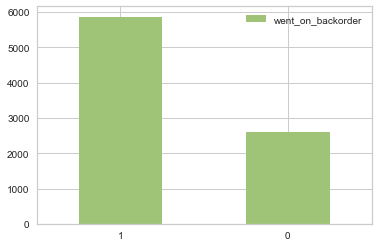

In [21]:
pd.DataFrame(df['went_on_backorder'].value_counts()).plot(kind='bar',rot=0,color='g')

#### Data Distribution

In [22]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

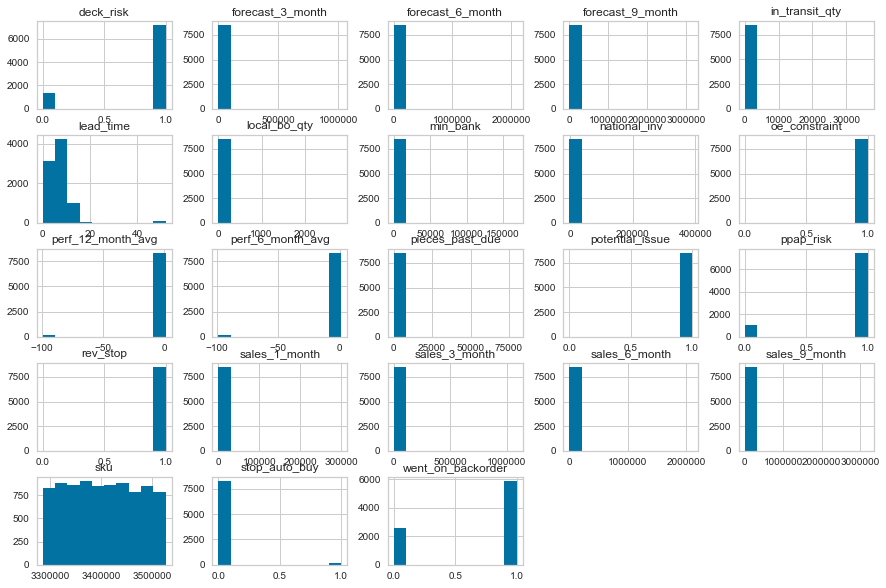

In [23]:
p=df.hist(figsize=(15,10))

C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



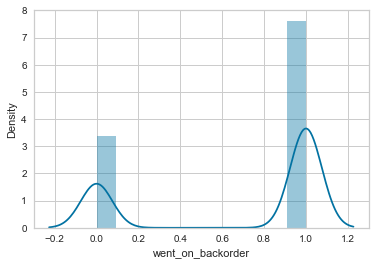

In [24]:
sns.distplot(df['went_on_backorder'])

C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



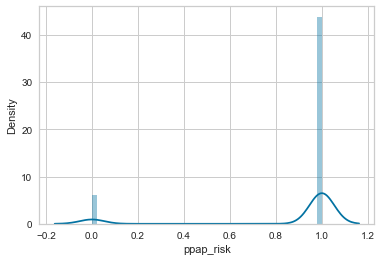

In [26]:
p=sns.distplot(df['ppap_risk'])

C:\Users\affine\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



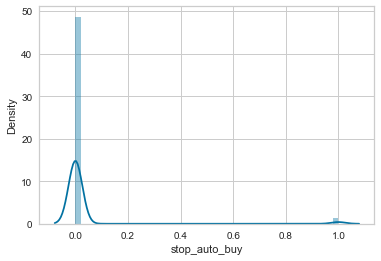

In [27]:
p=sns.distplot(df['stop_auto_buy'])

###  Outliers in Data?

####  Outlier detection( Box Plot )

In [28]:
total_col = len(df.columns)
n_col = 3 
n_row = int(total_col/n_col) if total_col%n_col ==0 else int(np.ceil(total_col/n_col)) 

IndexError: list index out of range

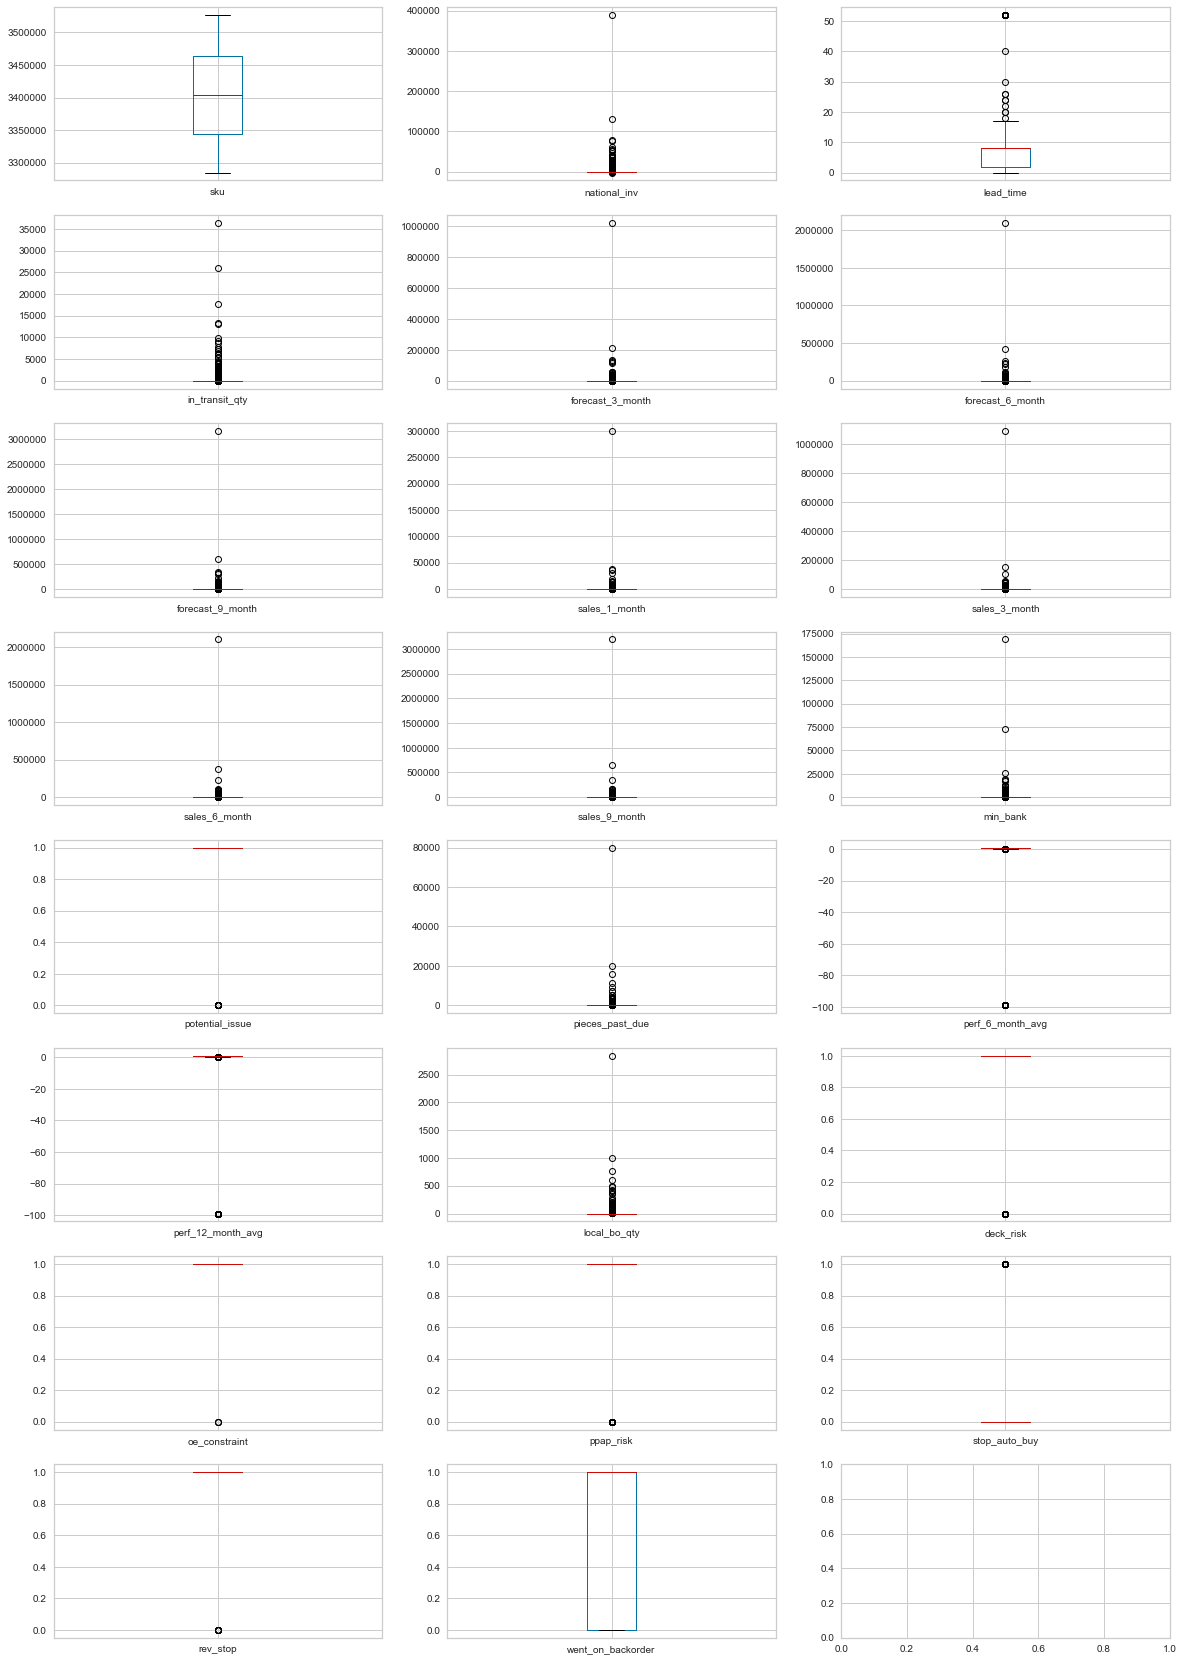

In [29]:
fig,axs=plt.subplots(n_row,n_col,figsize=(20,30))
df_col = list(df.columns)
i=0
for row in range(n_row):
    for col in range(n_col):
        df[[df_col[i]]].boxplot(ax=axs[row][col])
        i=i+1


In [ ]:
df.columns

In [31]:
#applying log1p transformation
log_df_col =['national_inv','lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank','pieces_past_due' ,'local_bo_qty']
for col in log_df_col:
    col_name=col+'_log'
    df[col_name]=np.log(1+df[col])

D:\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning:

divide by zero encountered in log

D:\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning:

invalid value encountered in log



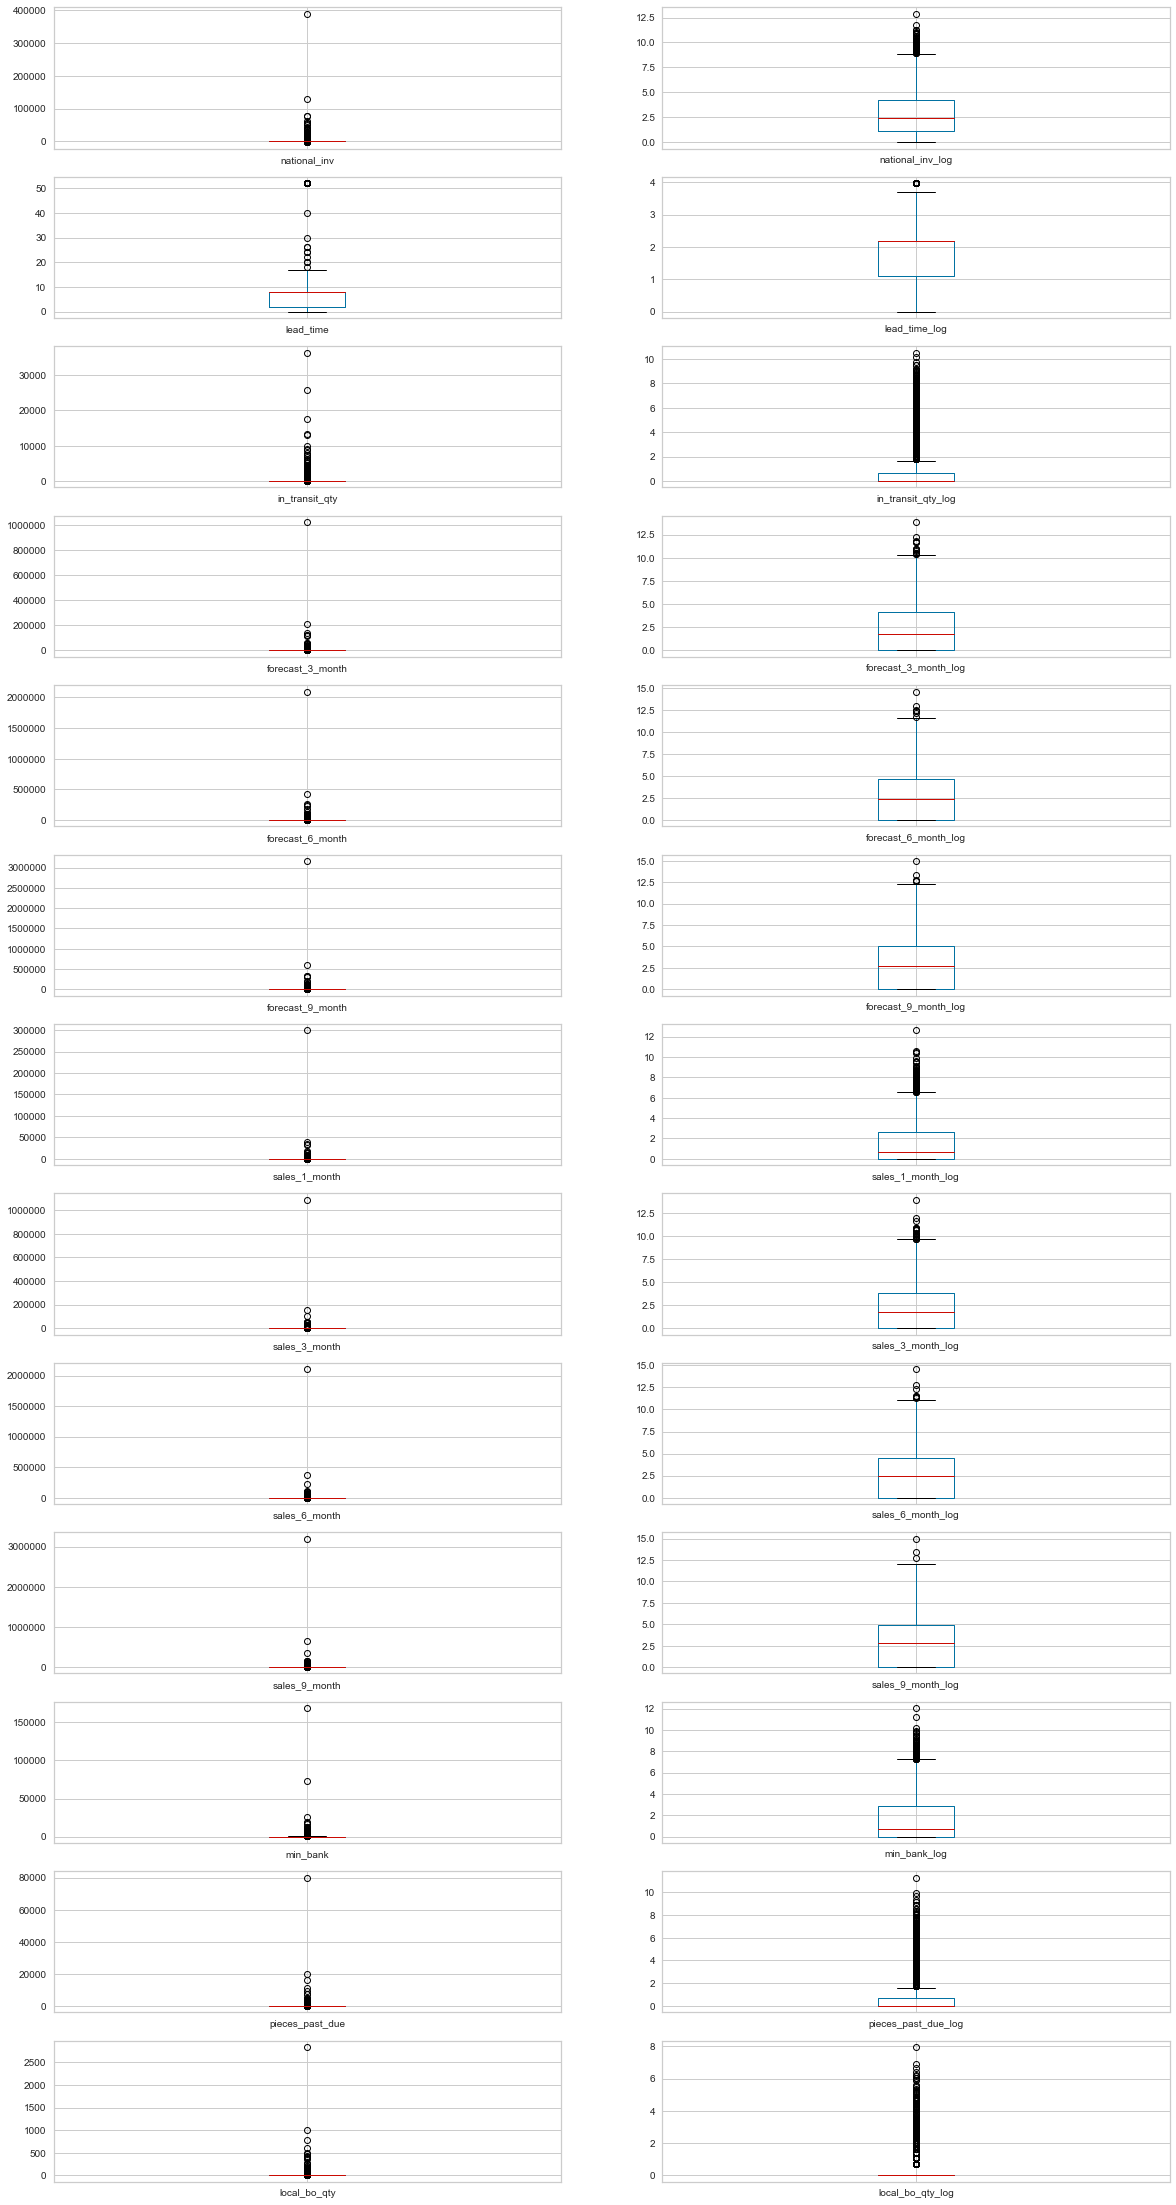

In [32]:
#lets compare the outliers before & after log transformation
total_col = len(log_df_col)*2
n_col = 2 
n_row = int(total_col/n_col) if total_col%n_col ==0 else int(np.ceil(total_col/n_col)) 
fig,axs=plt.subplots(n_row,n_col,figsize=(20,40))
df_col = [i+'_log' for i in log_df_col]
i=0
for row in range(n_row):
    df[[log_df_col[i]]].boxplot(ax=axs[row][0])
    df[[df_col[i]]].boxplot(ax=axs[row][1])
    i=i+1

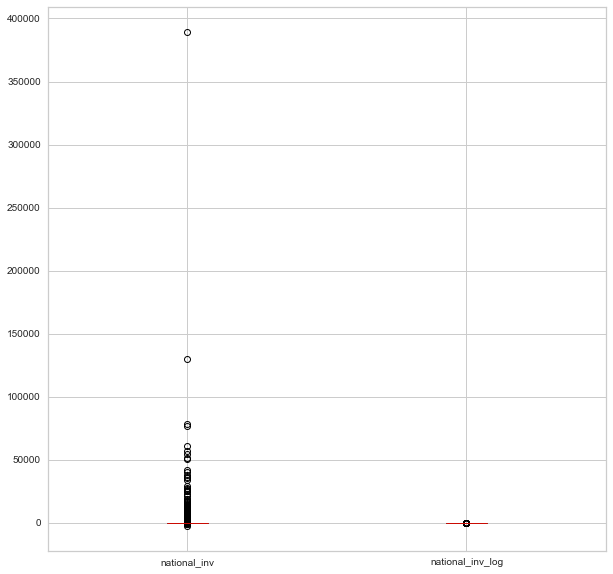

In [34]:
df[['national_inv','national_inv_log']].boxplot(figsize=(10,10))

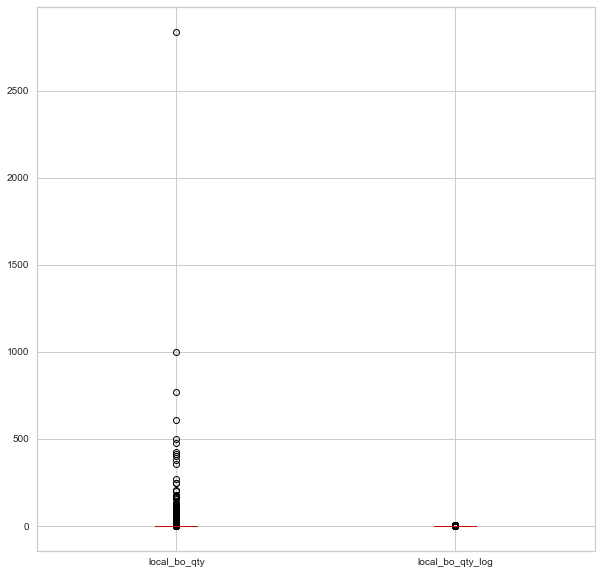

In [35]:
df[['local_bo_qty','local_bo_qty_log']].boxplot(figsize=(10,10))

<b>INSIGHTS</b> 
- even though number of outliers have decreased , there is significant amount of outliers, that needs to be treated

#### Outlier removal

In [36]:
#dropping the original columns without log
df.drop(columns=log_df_col,inplace=True)
df.columns

Index(['sku', 'potential_issue', 'perf_6_month_avg', 'perf_12_month_avg',
       'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'went_on_backorder', 'national_inv_log', 'lead_time_log',
       'in_transit_qty_log', 'forecast_3_month_log', 'forecast_6_month_log',
       'forecast_9_month_log', 'sales_1_month_log', 'sales_3_month_log',
       'sales_6_month_log', 'sales_9_month_log', 'min_bank_log',
       'pieces_past_due_log', 'local_bo_qty_log'],
      dtype='object')

In [37]:
#check for infinity & null values again after log transformation
df.isna().sum()

sku                       0
potential_issue           0
perf_6_month_avg          0
perf_12_month_avg         0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
national_inv_log        126
lead_time_log             0
in_transit_qty_log        0
forecast_3_month_log      0
forecast_6_month_log      0
forecast_9_month_log      0
sales_1_month_log         0
sales_3_month_log         0
sales_6_month_log         0
sales_9_month_log         0
min_bank_log              0
pieces_past_due_log       0
local_bo_qty_log          0
dtype: int64

In [38]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df.isna().sum()

sku                       0
potential_issue           0
perf_6_month_avg          0
perf_12_month_avg         0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
national_inv_log        166
lead_time_log             0
in_transit_qty_log        0
forecast_3_month_log      0
forecast_6_month_log      0
forecast_9_month_log      0
sales_1_month_log         0
sales_3_month_log         0
sales_6_month_log         0
sales_9_month_log         0
min_bank_log              0
pieces_past_due_log       0
local_bo_qty_log          0
dtype: int64

In [39]:
df.dropna(inplace=True)

<b> Insights </b>
- Sampling error:The outliers here can be defined under this, since we are dealing we very less training data.so we wont be using new data rather the data before outlier removal

<a href="https://www.linkedin.com/pulse/techniques-outlier-detection-treatment-suhas-jk/">refer here </a> or <a href="https://medium.com/towards-artificial-intelligence/outlier-detection-and-treatment-a-beginners-guide-c44af0699754"> here </a>

### Relationship between Parameters 

In [43]:
df.head()

,sku,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,...,forecast_3_month_log,forecast_6_month_log,forecast_9_month_log,sales_1_month_log,sales_3_month_log,sales_6_month_log,sales_9_month_log,min_bank_log,pieces_past_due_log,local_bo_qty_log
2,3286560,1,0.70,0.73,1,1,1,0,1,0,...,1.609438,2.079442,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,3299078,1,0.70,0.73,1,1,1,0,1,0,...,2.484907,3.332205,3.871201,1.098612,1.098612,1.098612,1.098612,0.000000,0.0,0.0
4,3314098,1,0.95,0.94,1,1,1,0,1,0,...,2.302585,2.708050,2.833213,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,0.0
5,3316047,1,0.57,0.68,0,1,1,0,1,0,...,2.397895,2.397895,2.397895,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,3317147,1,0.56,0.68,1,1,1,0,1,0,...,1.098612,1.386294,1.609438,0.000000,0.693147,1.098612,1.098612,0.693147,0.0,0.0


#### Potential issue


In [79]:
temp=df[['potential_issue','went_on_backorder']].groupby(['potential_issue','went_on_backorder']).agg({'went_on_backorder':'count'}).rename(columns={'went_on_backorder':'count'})
temp

count
potential_issue went_on_backorder       
0               0                      3
                1                      9
1               0                   2471
                1                   5824

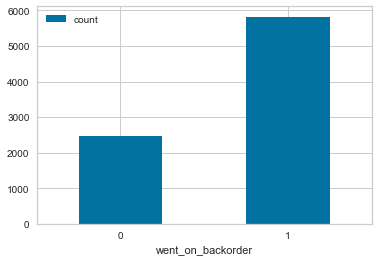

In [83]:
temp.loc[1].plot(kind='bar',rot=0)

#### stop auto buy

In [115]:
temp=df[['stop_auto_buy','went_on_backorder']].groupby(['went_on_backorder','stop_auto_buy']).agg({'went_on_backorder':'count'}).rename(columns={'went_on_backorder':'count'})
temp

count
went_on_backorder stop_auto_buy       
0                 0               2404
                  1                 70
1                 0               5685
                  1                148

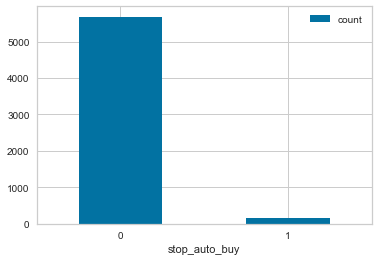

In [116]:
temp.loc[1].plot(kind='bar',rot=0)

### Correlation matrix and its heat map
- <b>A correlation matrix </b>is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [191]:
df.corr()

,sku,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,...,forecast_3_month_log,forecast_6_month_log,forecast_9_month_log,sales_1_month_log,sales_3_month_log,sales_6_month_log,sales_9_month_log,min_bank_log,pieces_past_due_log,local_bo_qty_log
sku,1.000000,-0.003714,-0.016348,-0.010078,-0.010733,0.006349,-0.003854,0.005398,-0.014186,-0.011883,...,0.002502,0.002480,0.002137,0.000950,-0.002973,-0.001398,-0.002574,-0.008041,-0.005869,0.002185
potential_issue,-0.003714,1.000000,0.013656,0.015588,0.018111,-0.000590,0.005037,0.006244,-0.001105,-0.003977,...,-0.044373,-0.042007,-0.040192,-0.011813,-0.011041,-0.009713,-0.008214,-0.029530,-0.022162,-0.018018
perf_6_month_avg,-0.016348,0.013656,1.000000,0.927550,0.042792,-0.002457,0.045176,-0.059469,0.021158,-0.043907,...,0.080522,0.088921,0.093646,0.084951,0.096848,0.103938,0.104378,0.062747,0.041790,0.018532
perf_12_month_avg,-0.010078,0.015588,0.927550,1.000000,0.043394,-0.002343,0.052805,-0.037489,0.023485,-0.049027,...,0.083677,0.092103,0.097541,0.087841,0.100440,0.107983,0.108780,0.068946,0.040039,0.018848
deck_risk,-0.010733,0.018111,0.042792,0.043394,1.000000,-0.006751,0.073302,-0.163260,-0.012634,-0.037938,...,0.165105,0.192626,0.213254,0.253027,0.289723,0.311167,0.325189,0.224939,0.115702,0.048923
oe_constraint,0.006349,-0.000590,-0.002457,-0.002343,-0.006751,1.000000,0.017797,0.002548,-0.000451,0.006861,...,-0.013393,-0.013962,-0.014841,-0.014330,-0.015570,-0.014942,-0.014552,-0.010239,-0.008608,0.002469
ppap_risk,-0.003854,0.005037,0.045176,0.052805,0.073302,0.017797,1.000000,-0.039310,0.064867,0.027500,...,-0.015793,-0.006399,-0.001341,0.022045,0.032693,0.036312,0.038544,-0.005188,-0.002974,-0.032917
stop_auto_buy,0.005398,0.006244,-0.059469,-0.037489,-0.163260,0.002548,-0.039310,1.000000,-0.124995,-0.008357,...,0.060633,0.046352,0.039680,0.033772,0.026858,0.025489,0.024646,0.033837,0.033964,0.050822
rev_stop,-0.014186,-0.001105,0.021158,0.023485,-0.012634,-0.000451,0.064867,-0.124995,1.000000,0.017375,...,0.014623,0.017802,0.019459,0.013927,0.018499,0.019970,0.018957,-0.002922,-0.000088,0.004620
went_on_backorder,-0.011883,-0.003977,-0.043907,-0.049027,-0.037938,0.006861,0.027500,-0.008357,0.017375,1.000000,...,-0.048391,-0.055573,-0.058909,0.038573,0.009575,0.004434,0.001983,0.172368,0.257058,-0.019480


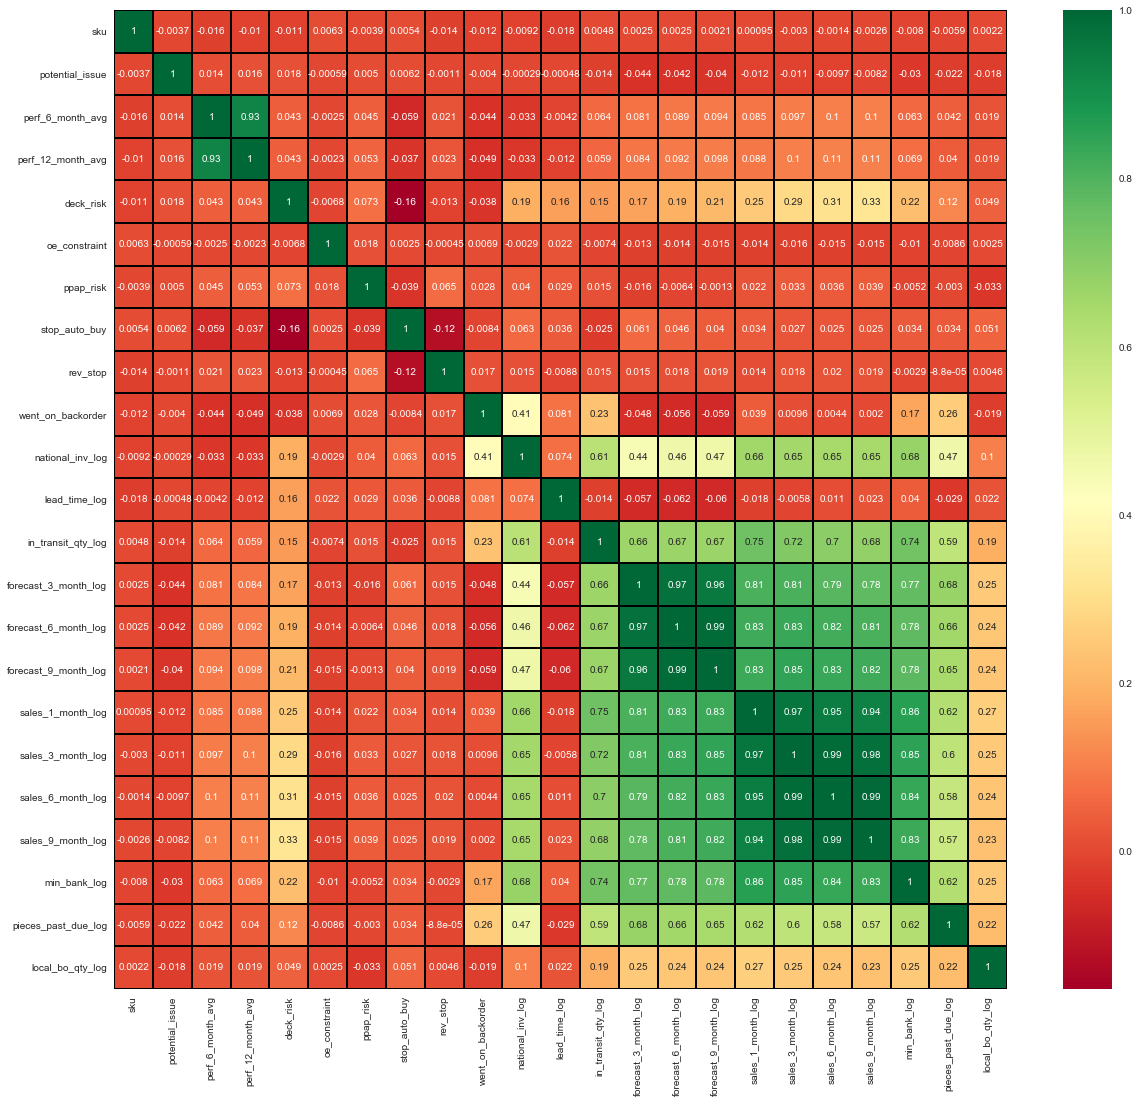

In [192]:
plt.figure(figsize=(20,18))
#matrix = np.triu(df_main.corr())
p=sns.heatmap(df.corr(), annot=True,cmap= 'RdYlGn',linewidths=1, linecolor='black')

<b> Insights </b>
- From the plot above, we can see that there is high correlation between forecast and sales. 
- peices_past_due  shows  high correlation with so many columns.


In [193]:
df.drop(columns=['sku'],inplace=True)

In [194]:
df.columns

Index(['potential_issue', 'perf_6_month_avg', 'perf_12_month_avg', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'went_on_backorder', 'national_inv_log', 'lead_time_log',
       'in_transit_qty_log', 'forecast_3_month_log', 'forecast_6_month_log',
       'forecast_9_month_log', 'sales_1_month_log', 'sales_3_month_log',
       'sales_6_month_log', 'sales_9_month_log', 'min_bank_log',
       'pieces_past_due_log', 'local_bo_qty_log'],
      dtype='object')

In [195]:
print(df_col)
print()
df_col_no_log=[ele.split('_log')[0]  for ele in df_col]
print(df_col_no_log)
print()
print(dict(zip(df_col,df_col_no_log)))

['national_inv_log', 'lead_time_log', 'in_transit_qty_log', 'forecast_3_month_log', 'forecast_6_month_log', 'forecast_9_month_log', 'sales_1_month_log', 'sales_3_month_log', 'sales_6_month_log', 'sales_9_month_log', 'min_bank_log', 'pieces_past_due_log', 'local_bo_qty_log']

['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'local_bo_qty']

{'national_inv_log': 'national_inv', 'lead_time_log': 'lead_time', 'in_transit_qty_log': 'in_transit_qty', 'forecast_3_month_log': 'forecast_3_month', 'forecast_6_month_log': 'forecast_6_month', 'forecast_9_month_log': 'forecast_9_month', 'sales_1_month_log': 'sales_1_month', 'sales_3_month_log': 'sales_3_month', 'sales_6_month_log': 'sales_6_month', 'sales_9_month_log': 'sales_9_month', 'min_bank_log': 'min_bank', 'pieces_past_due_log': 'pieces_past_due', 'local_bo_qty_log': 'local_bo_qty'}


In [196]:
#removing '_log' from column names added during log transformation 
df.rename(columns=dict(zip(df_col,df_col_no_log)),inplace=True)
df.columns

Index(['potential_issue', 'perf_6_month_avg', 'perf_12_month_avg', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'went_on_backorder', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'pieces_past_due', 'local_bo_qty'],
      dtype='object')

## Collinearity
- what is collinearity?
 >.
 - Collinearity can be defined simply as a high level of correlation between two variables. (When more than two variables are involved, this would be called as multicollinearity.) 
- why is it a problem?
 >. 
 - Collinearity is a problem in key driver analysis because, when two independent variables are highly correlated, it becomes difficult to accurately partial out their individual impact on the dependent variable. This often results in beta coefficients that don't appear to be reasonable
 >. 
 - When variables used in clustering are collinear, some variables get a higher weight than others. If two variables are perfectly correlated, they effectively represent the same concept. But that concept is now represented twice in the data and hence gets twice the weight of all the other variables. The final solution is likely to be skewed in the direction of that concept, which could be a problem if it’s not anticipated. 
- Example
>. 
 - For example, while the intention may have been to conduct a cluster analysis on 20 variables, it may actually be conducted on seven concepts that may be unequally weighted. In this situation, there could be a large gap between the intention of the analyst (clustering 20 variables) and what happens in reality (segments based on seven concepts). This could cause the segmentation analysis to go in an undesirable direction.

### VIF
A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a  model.
>. <i>Note :</i>A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

>. Explanation of Decision of threshold value and formulas can be found <a href="https://quantifyinghealth.com/vif-threshold/" ><i>here</i></a>

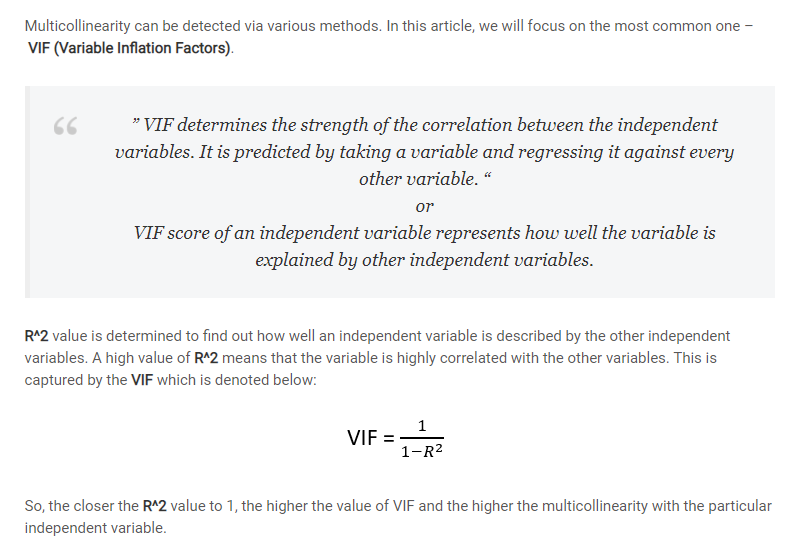

In [197]:
df.reset_index(drop=True,inplace=True)

In [198]:
df.columns

Index(['potential_issue', 'perf_6_month_avg', 'perf_12_month_avg', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'went_on_backorder', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'pieces_past_due', 'local_bo_qty'],
      dtype='object')

In [199]:
X = df.drop(["went_on_backorder"],axis=1)
y=df["went_on_backorder"]

In [200]:
X.columns

Index(['potential_issue', 'perf_6_month_avg', 'perf_12_month_avg', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'local_bo_qty'],
      dtype='object')

In [201]:
X_num=X.drop(columns=string_features)
print(X_num.columns)
print()
X_cat=X[string_features]
print(X_cat.columns)


Index(['perf_6_month_avg', 'perf_12_month_avg', 'national_inv', 'lead_time',
       'in_transit_qty', 'forecast_3_month', 'forecast_6_month',
       'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month',
       'sales_9_month', 'min_bank', 'pieces_past_due', 'local_bo_qty'],
      dtype='object')

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop'],
      dtype='object')


In [202]:
#scaling numerical columns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_num_scaled = pd.DataFrame(scalar.fit_transform(X_num),columns=X_num.columns)

In [203]:
X_num_scaled

,perf_6_month_avg,perf_12_month_avg,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,local_bo_qty
0,0.161782,0.151665,-1.284619,-1.386760,-0.505433,-0.297391,-0.244307,-0.317275,-0.824808,-0.994049,-1.084910,-1.133235,-0.749027,-0.487620,-0.159079
1,0.161782,0.151665,-0.324099,0.479024,-0.505433,0.057276,0.227521,0.328487,-0.254329,-0.520825,-0.652150,-0.720637,-0.749027,-0.487620,-0.159079
2,0.177460,0.165820,-1.284619,0.479024,-0.505433,-0.016585,-0.007554,-0.045610,-0.824808,-0.994049,-1.084910,-1.133235,-0.401533,-0.487620,-0.159079
3,0.153629,0.148294,-1.284619,-0.519220,-0.505433,0.022026,-0.124367,-0.202502,-0.824808,-0.994049,-1.084910,-1.133235,-0.749027,-0.487620,-0.159079
4,0.153002,0.148294,-1.284619,0.479024,-0.505433,-0.504335,-0.505367,-0.486668,-0.824808,-0.695478,-0.652150,-0.720637,-0.401533,-0.487620,-0.159079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8302,0.138578,0.124028,1.155760,-1.386760,1.406115,1.622032,1.601419,1.603584,1.616022,1.654384,1.644345,1.593810,1.642649,1.850958,-0.159079
8303,0.117883,0.102458,-1.284619,-1.386760,-0.505433,0.681336,0.488581,0.384044,-0.824808,-0.994049,-1.084910,-1.133235,-0.401533,1.308021,-0.159079
8304,0.161782,0.153687,0.483879,1.103535,1.241084,0.666603,0.683654,0.701175,0.581408,0.776697,0.800955,0.808606,1.047490,1.266224,-0.159079
8305,0.170561,0.160427,0.967296,0.479024,1.690900,0.777482,0.886323,0.910039,1.246562,1.078784,1.019515,1.028407,1.569600,1.065355,1.497111


In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [205]:
calc_vif(X_num_scaled)

D:\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning:

invalid value encountered in greater



,variables,VIF
0,perf_6_month_avg,7.181835
1,perf_12_month_avg,7.194161
2,national_inv,2.345847
3,lead_time,1.052416
4,in_transit_qty,2.707631
5,forecast_3_month,21.082922
6,forecast_6_month,79.488928
7,forecast_9_month,56.153301
8,sales_1_month,19.590744
9,sales_3_month,79.444886


In [206]:
final_list_columns=calculate_vif_(X_num_scaled,8) #function 1.7.3

15


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished


17:20:30 dropping 'sales_6_month' at index: 10
14
17:20:30 dropping 'forecast_6_month' at index: 6
13


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


17:20:30 dropping 'sales_3_month' at index: 8
12
17:20:30 dropping 'forecast_9_month' at index: 6
11


[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s


17:20:30 dropping 'sales_1_month' at index: 6
10
Remaining variables:
[['perf_6_month_avg', 'perf_12_month_avg', 'national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'local_bo_qty']]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [207]:
final_list_columns

['perf_6_month_avg',
 'perf_12_month_avg',
 'national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'local_bo_qty']

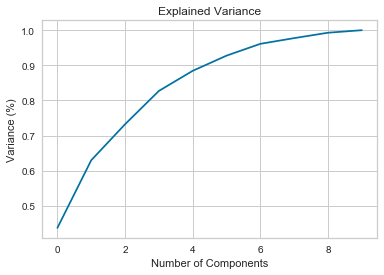

In [208]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_num_scaled[final_list_columns])
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

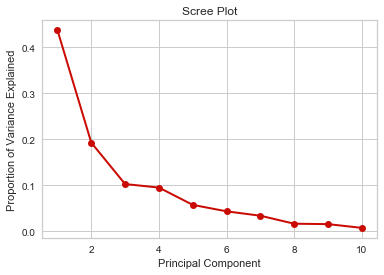

In [209]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

<b> COMPARING THE SCREE PLOTS ,WITH VIF DROPPING COLUMNS & WITHOUT DROPPING COLUMNS</b> 

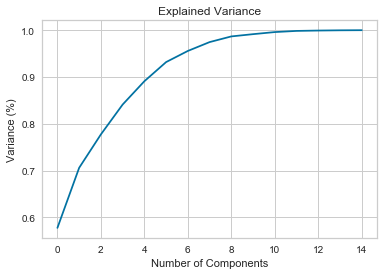

In [210]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_num_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

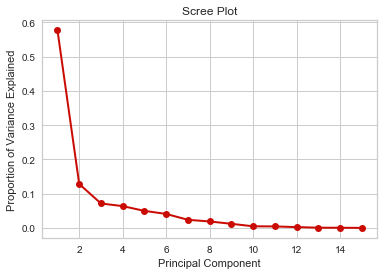

In [211]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.figure()
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

<b> Keeping the data without dropping any columns , as scree plot converges faster </b>,also the columns have meaningful information

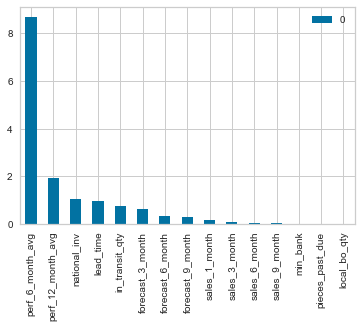

In [213]:
pd.DataFrame(pca.explained_variance_,index=X_num_scaled.columns).plot(kind='bar')

In [216]:
X_num_scaled.replace([np.inf, -np.inf], np.nan,inplace=True)
df.isna().sum()

potential_issue      0
perf_6_month_avg     0
perf_12_month_avg    0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
pieces_past_due      0
local_bo_qty         0
dtype: int64

In [217]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(X_num_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-'+str(i+1) for i in range(8)])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-2.351167,-0.457706,-1.750577,0.046992,-0.243496,0.155989,0.376368,0.091619
1,-1.068459,-0.308702,0.021368,0.215136,-0.892985,-0.095779,0.178492,0.657406
2,-2.006436,-0.430113,-0.243176,0.506625,-1.292506,0.193445,0.534244,0.306153
3,-2.184133,-0.432256,-1.102968,0.279270,-0.814509,0.166985,0.448716,0.227806
4,-2.081427,-0.396235,0.101501,0.362140,-0.713770,-0.084825,0.248243,-0.333910
...,...,...,...,...,...,...,...,...
8302,5.205137,0.071372,-1.220600,-0.866175,0.240032,0.462962,-0.325420,-0.187679
8303,-1.063898,-0.327781,-2.337862,0.307338,-1.284819,1.438124,-0.311571,0.223039
8304,2.665030,-0.031672,1.001371,-0.112021,-0.584981,0.775777,0.168507,-0.472715
8305,3.794375,0.041313,0.584380,1.047119,0.626280,0.551286,0.528626,-0.224997


In [218]:
calc_vif(principal_x)

,variables,VIF
0,PC-1,1.0
1,PC-2,1.0
2,PC-3,1.0
3,PC-4,1.0
4,PC-5,1.0
5,PC-6,1.0
6,PC-7,1.0
7,PC-8,1.0


## Model

In [219]:
X_cat

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,1,1,1,1,0,1
1,1,1,1,1,0,1
2,1,1,1,1,0,1
3,1,0,1,1,0,1
4,1,1,1,1,0,1
...,...,...,...,...,...,...
8302,1,1,1,1,0,1
8303,1,0,1,0,0,1
8304,1,1,1,1,0,1
8305,1,1,1,1,0,1


In [220]:
#features=
principal_x = pd.concat([principal_x,X_cat.reset_index(drop=True)],axis=1)
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,-2.351167,-0.457706,-1.750577,0.046992,-0.243496,0.155989,0.376368,0.091619,1,1,1,1,0,1
1,-1.068459,-0.308702,0.021368,0.215136,-0.892985,-0.095779,0.178492,0.657406,1,1,1,1,0,1
2,-2.006436,-0.430113,-0.243176,0.506625,-1.292506,0.193445,0.534244,0.306153,1,1,1,1,0,1
3,-2.184133,-0.432256,-1.102968,0.279270,-0.814509,0.166985,0.448716,0.227806,1,0,1,1,0,1
4,-2.081427,-0.396235,0.101501,0.362140,-0.713770,-0.084825,0.248243,-0.333910,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8302,5.205137,0.071372,-1.220600,-0.866175,0.240032,0.462962,-0.325420,-0.187679,1,1,1,1,0,1
8303,-1.063898,-0.327781,-2.337862,0.307338,-1.284819,1.438124,-0.311571,0.223039,1,0,1,0,0,1
8304,2.665030,-0.031672,1.001371,-0.112021,-0.584981,0.775777,0.168507,-0.472715,1,1,1,1,0,1
8305,3.794375,0.041313,0.584380,1.047119,0.626280,0.551286,0.528626,-0.224997,1,1,1,1,0,1


In [221]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8302    1
8303    1
8304    1
8305    1
8306    1
Name: went_on_backorder, Length: 8307, dtype: int64

In [222]:
import sklearn
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(principal_x,y,test_size=1 / 3,random_state=0)                                                                                                                                                                                     

### CatBOOST

In [365]:
from catboost import CatBoostClassifier
estimator=CatBoostClassifier()
params_grid={'learning_rate': [0.021846000105142593], 'subsample': [0.800000011920929],
             'boosting_type': ['Plain'], 'bootstrap_type': ['MVS'], 'nan_mode': ['Min'],
             'eval_metric': ['Logloss'], 'model_shrink_rate': [0], 'iterations': [1000], 
             'model_shrink_mode': ['Constant'], 'sampling_frequency': ['PerTree'],
             'min_data_in_leaf': [1], 'leaf_estimation_iterations': [10], 
             'use_best_model': [False], 'penalties_coefficient': [1],
             'l2_leaf_reg': [3], 'leaf_estimation_method': ['Newton'],
             'task_type': ['CPU'], 'boost_from_average': [False],
             'leaf_estimation_backtracking': ['AnyImprovement'],
              'grow_policy': ['SymmetricTree'], 
             'feature_border_type': ['GreedyLogSum'], 'border_count': [254], 
             'max_leaves': [64], 'score_function': ['Cosine'],
             'class_names': [[0, 1]], 'best_model_min_trees': [1], 
             'sparse_features_conflict_fraction': [0], 'rsm': [1], 
             'posterior_sampling': [False], 'random_seed': [786], 
             'depth': [6], 'random_strength': [1], 
             'loss_function': ['Logloss'], 'model_size_reg': [0.5], 
              'classes_count': [0]}
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5, return_train_score=False)
grid_cv.fit(x_train, y_train)
best_estimator = grid_cv.best_estimator_


0:	learn: 0.6741668	total: 17.1ms	remaining: 17.1s
1:	learn: 0.6547114	total: 33.6ms	remaining: 16.8s
2:	learn: 0.6357759	total: 40ms	remaining: 13.3s
3:	learn: 0.6176435	total: 46.4ms	remaining: 11.6s
4:	learn: 0.6004659	total: 52.8ms	remaining: 10.5s
5:	learn: 0.5842178	total: 59.1ms	remaining: 9.8s
6:	learn: 0.5712315	total: 64.6ms	remaining: 9.16s
7:	learn: 0.5567576	total: 69.6ms	remaining: 8.63s
8:	learn: 0.5435605	total: 75.5ms	remaining: 8.31s
9:	learn: 0.5301795	total: 80.6ms	remaining: 7.98s
10:	learn: 0.5187022	total: 85.8ms	remaining: 7.71s
11:	learn: 0.5076871	total: 90.8ms	remaining: 7.47s
12:	learn: 0.4974023	total: 95.7ms	remaining: 7.27s
13:	learn: 0.4880311	total: 101ms	remaining: 7.11s
14:	learn: 0.4792027	total: 106ms	remaining: 6.96s
15:	learn: 0.4709271	total: 111ms	remaining: 6.84s
16:	learn: 0.4628473	total: 116ms	remaining: 6.72s
17:	learn: 0.4555406	total: 121ms	remaining: 6.62s
18:	learn: 0.4488140	total: 126ms	remaining: 6.52s
19:	learn: 0.4417388	total: 131

177:	learn: 0.2660800	total: 1.07s	remaining: 4.94s
178:	learn: 0.2658538	total: 1.07s	remaining: 4.93s
179:	learn: 0.2657154	total: 1.08s	remaining: 4.93s
180:	learn: 0.2654851	total: 1.09s	remaining: 4.92s
181:	learn: 0.2652168	total: 1.09s	remaining: 4.91s
182:	learn: 0.2648948	total: 1.1s	remaining: 4.92s
183:	learn: 0.2645654	total: 1.11s	remaining: 4.92s
184:	learn: 0.2644045	total: 1.12s	remaining: 4.92s
185:	learn: 0.2642340	total: 1.12s	remaining: 4.9s
186:	learn: 0.2640572	total: 1.13s	remaining: 4.9s
187:	learn: 0.2639236	total: 1.13s	remaining: 4.89s
188:	learn: 0.2637402	total: 1.14s	remaining: 4.89s
189:	learn: 0.2635918	total: 1.15s	remaining: 4.88s
190:	learn: 0.2633182	total: 1.15s	remaining: 4.87s
191:	learn: 0.2631756	total: 1.16s	remaining: 4.86s
192:	learn: 0.2630111	total: 1.16s	remaining: 4.85s
193:	learn: 0.2628161	total: 1.17s	remaining: 4.84s
194:	learn: 0.2624969	total: 1.17s	remaining: 4.83s
195:	learn: 0.2621659	total: 1.18s	remaining: 4.83s
196:	learn: 0.2

360:	learn: 0.2340590	total: 2.11s	remaining: 3.74s
361:	learn: 0.2339657	total: 2.12s	remaining: 3.73s
362:	learn: 0.2337938	total: 2.12s	remaining: 3.73s
363:	learn: 0.2335710	total: 2.13s	remaining: 3.72s
364:	learn: 0.2333857	total: 2.13s	remaining: 3.71s
365:	learn: 0.2332807	total: 2.14s	remaining: 3.71s
366:	learn: 0.2331152	total: 2.15s	remaining: 3.7s
367:	learn: 0.2329510	total: 2.15s	remaining: 3.7s
368:	learn: 0.2328470	total: 2.16s	remaining: 3.7s
369:	learn: 0.2326832	total: 2.17s	remaining: 3.69s
370:	learn: 0.2325157	total: 2.17s	remaining: 3.68s
371:	learn: 0.2324517	total: 2.18s	remaining: 3.68s
372:	learn: 0.2322690	total: 2.18s	remaining: 3.67s
373:	learn: 0.2321174	total: 2.19s	remaining: 3.66s
374:	learn: 0.2319768	total: 2.19s	remaining: 3.65s
375:	learn: 0.2318666	total: 2.2s	remaining: 3.65s
376:	learn: 0.2316852	total: 2.2s	remaining: 3.64s
377:	learn: 0.2315473	total: 2.21s	remaining: 3.63s
378:	learn: 0.2314005	total: 2.21s	remaining: 3.63s
379:	learn: 0.231

547:	learn: 0.2085244	total: 3.15s	remaining: 2.6s
548:	learn: 0.2083368	total: 3.15s	remaining: 2.59s
549:	learn: 0.2081955	total: 3.16s	remaining: 2.59s
550:	learn: 0.2080262	total: 3.17s	remaining: 2.58s
551:	learn: 0.2079578	total: 3.18s	remaining: 2.58s
552:	learn: 0.2077899	total: 3.19s	remaining: 2.57s
553:	learn: 0.2076763	total: 3.19s	remaining: 2.57s
554:	learn: 0.2075913	total: 3.2s	remaining: 2.56s
555:	learn: 0.2074831	total: 3.2s	remaining: 2.56s
556:	learn: 0.2073773	total: 3.21s	remaining: 2.55s
557:	learn: 0.2072376	total: 3.21s	remaining: 2.55s
558:	learn: 0.2071618	total: 3.22s	remaining: 2.54s
559:	learn: 0.2070145	total: 3.23s	remaining: 2.53s
560:	learn: 0.2068232	total: 3.23s	remaining: 2.53s
561:	learn: 0.2067483	total: 3.24s	remaining: 2.52s
562:	learn: 0.2066370	total: 3.24s	remaining: 2.52s
563:	learn: 0.2065618	total: 3.25s	remaining: 2.51s
564:	learn: 0.2064781	total: 3.25s	remaining: 2.5s
565:	learn: 0.2063296	total: 3.26s	remaining: 2.5s
566:	learn: 0.206

735:	learn: 0.1867714	total: 4.19s	remaining: 1.5s
736:	learn: 0.1866786	total: 4.19s	remaining: 1.5s
737:	learn: 0.1865468	total: 4.2s	remaining: 1.49s
738:	learn: 0.1864306	total: 4.21s	remaining: 1.49s
739:	learn: 0.1863268	total: 4.21s	remaining: 1.48s
740:	learn: 0.1862454	total: 4.22s	remaining: 1.48s
741:	learn: 0.1861532	total: 4.23s	remaining: 1.47s
742:	learn: 0.1860566	total: 4.23s	remaining: 1.46s
743:	learn: 0.1858990	total: 4.24s	remaining: 1.46s
744:	learn: 0.1857422	total: 4.24s	remaining: 1.45s
745:	learn: 0.1856987	total: 4.25s	remaining: 1.45s
746:	learn: 0.1855702	total: 4.25s	remaining: 1.44s
747:	learn: 0.1854721	total: 4.26s	remaining: 1.43s
748:	learn: 0.1853217	total: 4.26s	remaining: 1.43s
749:	learn: 0.1852512	total: 4.27s	remaining: 1.42s
750:	learn: 0.1852007	total: 4.27s	remaining: 1.42s
751:	learn: 0.1851101	total: 4.28s	remaining: 1.41s
752:	learn: 0.1850324	total: 4.28s	remaining: 1.4s
753:	learn: 0.1849586	total: 4.29s	remaining: 1.4s
754:	learn: 0.184

919:	learn: 0.1693929	total: 5.23s	remaining: 455ms
920:	learn: 0.1692897	total: 5.24s	remaining: 449ms
921:	learn: 0.1692271	total: 5.25s	remaining: 444ms
922:	learn: 0.1691066	total: 5.25s	remaining: 438ms
923:	learn: 0.1690434	total: 5.26s	remaining: 432ms
924:	learn: 0.1689546	total: 5.26s	remaining: 427ms
925:	learn: 0.1688723	total: 5.27s	remaining: 421ms
926:	learn: 0.1687448	total: 5.28s	remaining: 416ms
927:	learn: 0.1686563	total: 5.28s	remaining: 410ms
928:	learn: 0.1685823	total: 5.29s	remaining: 404ms
929:	learn: 0.1685191	total: 5.29s	remaining: 398ms
930:	learn: 0.1683254	total: 5.3s	remaining: 393ms
931:	learn: 0.1682510	total: 5.31s	remaining: 387ms
932:	learn: 0.1681877	total: 5.31s	remaining: 381ms
933:	learn: 0.1681337	total: 5.32s	remaining: 376ms
934:	learn: 0.1680831	total: 5.32s	remaining: 370ms
935:	learn: 0.1680590	total: 5.33s	remaining: 364ms
936:	learn: 0.1680092	total: 5.33s	remaining: 359ms
937:	learn: 0.1678960	total: 5.34s	remaining: 353ms
938:	learn: 0

92:	learn: 0.2950231	total: 534ms	remaining: 5.21s
93:	learn: 0.2944790	total: 542ms	remaining: 5.22s
94:	learn: 0.2939322	total: 548ms	remaining: 5.22s
95:	learn: 0.2934569	total: 555ms	remaining: 5.22s
96:	learn: 0.2930221	total: 561ms	remaining: 5.22s
97:	learn: 0.2924221	total: 568ms	remaining: 5.23s
98:	learn: 0.2917673	total: 574ms	remaining: 5.22s
99:	learn: 0.2912353	total: 579ms	remaining: 5.21s
100:	learn: 0.2908019	total: 584ms	remaining: 5.2s
101:	learn: 0.2902897	total: 589ms	remaining: 5.18s
102:	learn: 0.2896957	total: 594ms	remaining: 5.17s
103:	learn: 0.2893826	total: 599ms	remaining: 5.16s
104:	learn: 0.2888693	total: 604ms	remaining: 5.15s
105:	learn: 0.2885520	total: 609ms	remaining: 5.14s
106:	learn: 0.2880077	total: 615ms	remaining: 5.13s
107:	learn: 0.2875694	total: 620ms	remaining: 5.12s
108:	learn: 0.2870226	total: 624ms	remaining: 5.1s
109:	learn: 0.2866847	total: 629ms	remaining: 5.09s
110:	learn: 0.2863096	total: 634ms	remaining: 5.08s
111:	learn: 0.2858802	

283:	learn: 0.2460102	total: 1.57s	remaining: 3.97s
284:	learn: 0.2458485	total: 1.58s	remaining: 3.97s
285:	learn: 0.2455755	total: 1.59s	remaining: 3.96s
286:	learn: 0.2454192	total: 1.59s	remaining: 3.96s
287:	learn: 0.2452612	total: 1.6s	remaining: 3.96s
288:	learn: 0.2451567	total: 1.61s	remaining: 3.96s
289:	learn: 0.2449460	total: 1.61s	remaining: 3.95s
290:	learn: 0.2448377	total: 1.62s	remaining: 3.94s
291:	learn: 0.2447563	total: 1.62s	remaining: 3.94s
292:	learn: 0.2445220	total: 1.63s	remaining: 3.93s
293:	learn: 0.2443298	total: 1.63s	remaining: 3.92s
294:	learn: 0.2441467	total: 1.64s	remaining: 3.92s
295:	learn: 0.2439290	total: 1.65s	remaining: 3.91s
296:	learn: 0.2436836	total: 1.65s	remaining: 3.91s
297:	learn: 0.2435488	total: 1.66s	remaining: 3.9s
298:	learn: 0.2433340	total: 1.66s	remaining: 3.89s
299:	learn: 0.2431693	total: 1.67s	remaining: 3.89s
300:	learn: 0.2429862	total: 1.67s	remaining: 3.88s
301:	learn: 0.2427265	total: 1.68s	remaining: 3.87s
302:	learn: 0.

460:	learn: 0.2188879	total: 2.62s	remaining: 3.06s
461:	learn: 0.2186921	total: 2.62s	remaining: 3.05s
462:	learn: 0.2185859	total: 2.63s	remaining: 3.05s
463:	learn: 0.2184021	total: 2.64s	remaining: 3.04s
464:	learn: 0.2182479	total: 2.65s	remaining: 3.04s
465:	learn: 0.2181402	total: 2.65s	remaining: 3.04s
466:	learn: 0.2179769	total: 2.66s	remaining: 3.03s
467:	learn: 0.2178435	total: 2.66s	remaining: 3.03s
468:	learn: 0.2176963	total: 2.67s	remaining: 3.02s
469:	learn: 0.2175517	total: 2.67s	remaining: 3.02s
470:	learn: 0.2174098	total: 2.68s	remaining: 3.01s
471:	learn: 0.2172061	total: 2.69s	remaining: 3s
472:	learn: 0.2170322	total: 2.69s	remaining: 3s
473:	learn: 0.2168787	total: 2.7s	remaining: 2.99s
474:	learn: 0.2166264	total: 2.7s	remaining: 2.98s
475:	learn: 0.2165075	total: 2.71s	remaining: 2.98s
476:	learn: 0.2164396	total: 2.71s	remaining: 2.97s
477:	learn: 0.2163004	total: 2.72s	remaining: 2.97s
478:	learn: 0.2161021	total: 2.72s	remaining: 2.96s
479:	learn: 0.215908

631:	learn: 0.1954676	total: 3.65s	remaining: 2.13s
632:	learn: 0.1952788	total: 3.66s	remaining: 2.12s
633:	learn: 0.1951394	total: 3.67s	remaining: 2.12s
634:	learn: 0.1949721	total: 3.68s	remaining: 2.11s
635:	learn: 0.1948608	total: 3.69s	remaining: 2.11s
636:	learn: 0.1946856	total: 3.69s	remaining: 2.1s
637:	learn: 0.1945314	total: 3.7s	remaining: 2.1s
638:	learn: 0.1944133	total: 3.71s	remaining: 2.09s
639:	learn: 0.1942806	total: 3.71s	remaining: 2.09s
640:	learn: 0.1941603	total: 3.72s	remaining: 2.08s
641:	learn: 0.1940091	total: 3.73s	remaining: 2.08s
642:	learn: 0.1938751	total: 3.73s	remaining: 2.07s
643:	learn: 0.1937505	total: 3.74s	remaining: 2.06s
644:	learn: 0.1935814	total: 3.74s	remaining: 2.06s
645:	learn: 0.1934695	total: 3.75s	remaining: 2.05s
646:	learn: 0.1934120	total: 3.75s	remaining: 2.05s
647:	learn: 0.1933462	total: 3.76s	remaining: 2.04s
648:	learn: 0.1932593	total: 3.76s	remaining: 2.04s
649:	learn: 0.1932318	total: 3.77s	remaining: 2.03s
650:	learn: 0.1

790:	learn: 0.1779419	total: 4.74s	remaining: 1.25s
791:	learn: 0.1778176	total: 4.75s	remaining: 1.25s
792:	learn: 0.1777714	total: 4.75s	remaining: 1.24s
793:	learn: 0.1776302	total: 4.76s	remaining: 1.24s
794:	learn: 0.1775015	total: 4.77s	remaining: 1.23s
795:	learn: 0.1774022	total: 4.78s	remaining: 1.22s
796:	learn: 0.1773100	total: 4.79s	remaining: 1.22s
797:	learn: 0.1772364	total: 4.79s	remaining: 1.21s
798:	learn: 0.1771529	total: 4.8s	remaining: 1.21s
799:	learn: 0.1770438	total: 4.8s	remaining: 1.2s
800:	learn: 0.1768783	total: 4.81s	remaining: 1.2s
801:	learn: 0.1768189	total: 4.82s	remaining: 1.19s
802:	learn: 0.1767493	total: 4.82s	remaining: 1.18s
803:	learn: 0.1766459	total: 4.83s	remaining: 1.18s
804:	learn: 0.1765321	total: 4.84s	remaining: 1.17s
805:	learn: 0.1764892	total: 4.85s	remaining: 1.17s
806:	learn: 0.1763899	total: 4.85s	remaining: 1.16s
807:	learn: 0.1762760	total: 4.86s	remaining: 1.15s
808:	learn: 0.1761884	total: 4.87s	remaining: 1.15s
809:	learn: 0.17

955:	learn: 0.1624758	total: 5.78s	remaining: 266ms
956:	learn: 0.1624148	total: 5.79s	remaining: 260ms
957:	learn: 0.1623705	total: 5.79s	remaining: 254ms
958:	learn: 0.1622766	total: 5.8s	remaining: 248ms
959:	learn: 0.1621711	total: 5.81s	remaining: 242ms
960:	learn: 0.1620945	total: 5.82s	remaining: 236ms
961:	learn: 0.1620139	total: 5.82s	remaining: 230ms
962:	learn: 0.1618871	total: 5.83s	remaining: 224ms
963:	learn: 0.1618358	total: 5.83s	remaining: 218ms
964:	learn: 0.1617438	total: 5.84s	remaining: 212ms
965:	learn: 0.1617047	total: 5.84s	remaining: 206ms
966:	learn: 0.1615970	total: 5.85s	remaining: 200ms
967:	learn: 0.1614855	total: 5.86s	remaining: 194ms
968:	learn: 0.1614428	total: 5.86s	remaining: 187ms
969:	learn: 0.1613654	total: 5.87s	remaining: 181ms
970:	learn: 0.1612945	total: 5.87s	remaining: 175ms
971:	learn: 0.1612071	total: 5.88s	remaining: 169ms
972:	learn: 0.1610950	total: 5.88s	remaining: 163ms
973:	learn: 0.1610563	total: 5.89s	remaining: 157ms
974:	learn: 0

135:	learn: 0.2799703	total: 882ms	remaining: 5.6s
136:	learn: 0.2795609	total: 889ms	remaining: 5.6s
137:	learn: 0.2793946	total: 897ms	remaining: 5.6s
138:	learn: 0.2790582	total: 905ms	remaining: 5.61s
139:	learn: 0.2788224	total: 912ms	remaining: 5.6s
140:	learn: 0.2785180	total: 920ms	remaining: 5.6s
141:	learn: 0.2782476	total: 926ms	remaining: 5.6s
142:	learn: 0.2780552	total: 932ms	remaining: 5.58s
143:	learn: 0.2778756	total: 938ms	remaining: 5.57s
144:	learn: 0.2775474	total: 943ms	remaining: 5.56s
145:	learn: 0.2771227	total: 949ms	remaining: 5.55s
146:	learn: 0.2767563	total: 954ms	remaining: 5.54s
147:	learn: 0.2764879	total: 960ms	remaining: 5.52s
148:	learn: 0.2760979	total: 965ms	remaining: 5.51s
149:	learn: 0.2757536	total: 970ms	remaining: 5.5s
150:	learn: 0.2756162	total: 975ms	remaining: 5.48s
151:	learn: 0.2753433	total: 981ms	remaining: 5.47s
152:	learn: 0.2749080	total: 987ms	remaining: 5.46s
153:	learn: 0.2745570	total: 992ms	remaining: 5.45s
154:	learn: 0.27412

323:	learn: 0.2412916	total: 1.92s	remaining: 4.01s
324:	learn: 0.2411830	total: 1.93s	remaining: 4.01s
325:	learn: 0.2410882	total: 1.94s	remaining: 4.01s
326:	learn: 0.2408825	total: 1.94s	remaining: 4s
327:	learn: 0.2407247	total: 1.95s	remaining: 4s
328:	learn: 0.2405656	total: 1.96s	remaining: 3.99s
329:	learn: 0.2403875	total: 1.96s	remaining: 3.98s
330:	learn: 0.2402446	total: 1.97s	remaining: 3.98s
331:	learn: 0.2401329	total: 1.97s	remaining: 3.97s
332:	learn: 0.2398961	total: 1.98s	remaining: 3.96s
333:	learn: 0.2396984	total: 1.98s	remaining: 3.95s
334:	learn: 0.2396252	total: 1.99s	remaining: 3.94s
335:	learn: 0.2395024	total: 1.99s	remaining: 3.94s
336:	learn: 0.2393294	total: 2s	remaining: 3.93s
337:	learn: 0.2392636	total: 2s	remaining: 3.92s
338:	learn: 0.2391275	total: 2.01s	remaining: 3.91s
339:	learn: 0.2389704	total: 2.01s	remaining: 3.91s
340:	learn: 0.2388638	total: 2.02s	remaining: 3.9s
341:	learn: 0.2387931	total: 2.02s	remaining: 3.89s
342:	learn: 0.2386357	tot

500:	learn: 0.2177472	total: 2.96s	remaining: 2.95s
501:	learn: 0.2175959	total: 2.97s	remaining: 2.95s
502:	learn: 0.2174836	total: 2.98s	remaining: 2.95s
503:	learn: 0.2173945	total: 2.99s	remaining: 2.94s
504:	learn: 0.2172927	total: 3s	remaining: 2.94s
505:	learn: 0.2172259	total: 3s	remaining: 2.93s
506:	learn: 0.2171381	total: 3.01s	remaining: 2.93s
507:	learn: 0.2170285	total: 3.02s	remaining: 2.92s
508:	learn: 0.2169070	total: 3.02s	remaining: 2.91s
509:	learn: 0.2168094	total: 3.02s	remaining: 2.91s
510:	learn: 0.2166703	total: 3.03s	remaining: 2.9s
511:	learn: 0.2165278	total: 3.04s	remaining: 2.89s
512:	learn: 0.2164069	total: 3.04s	remaining: 2.89s
513:	learn: 0.2162674	total: 3.05s	remaining: 2.88s
514:	learn: 0.2160879	total: 3.05s	remaining: 2.88s
515:	learn: 0.2159273	total: 3.06s	remaining: 2.87s
516:	learn: 0.2158150	total: 3.07s	remaining: 2.86s
517:	learn: 0.2157147	total: 3.07s	remaining: 2.86s
518:	learn: 0.2155687	total: 3.08s	remaining: 2.85s
519:	learn: 0.21537

676:	learn: 0.1954981	total: 4s	remaining: 1.91s
677:	learn: 0.1954148	total: 4.01s	remaining: 1.91s
678:	learn: 0.1953618	total: 4.02s	remaining: 1.9s
679:	learn: 0.1952121	total: 4.03s	remaining: 1.9s
680:	learn: 0.1950758	total: 4.04s	remaining: 1.89s
681:	learn: 0.1949782	total: 4.04s	remaining: 1.89s
682:	learn: 0.1948386	total: 4.05s	remaining: 1.88s
683:	learn: 0.1947643	total: 4.06s	remaining: 1.87s
684:	learn: 0.1946243	total: 4.06s	remaining: 1.87s
685:	learn: 0.1945201	total: 4.07s	remaining: 1.86s
686:	learn: 0.1943935	total: 4.07s	remaining: 1.85s
687:	learn: 0.1943125	total: 4.08s	remaining: 1.85s
688:	learn: 0.1942242	total: 4.08s	remaining: 1.84s
689:	learn: 0.1941197	total: 4.09s	remaining: 1.84s
690:	learn: 0.1940751	total: 4.09s	remaining: 1.83s
691:	learn: 0.1939652	total: 4.1s	remaining: 1.82s
692:	learn: 0.1938985	total: 4.1s	remaining: 1.82s
693:	learn: 0.1937782	total: 4.11s	remaining: 1.81s
694:	learn: 0.1936652	total: 4.11s	remaining: 1.8s
695:	learn: 0.193541

842:	learn: 0.1782591	total: 5.05s	remaining: 940ms
843:	learn: 0.1781867	total: 5.05s	remaining: 934ms
844:	learn: 0.1781362	total: 5.06s	remaining: 929ms
845:	learn: 0.1780795	total: 5.07s	remaining: 923ms
846:	learn: 0.1779793	total: 5.07s	remaining: 917ms
847:	learn: 0.1779283	total: 5.08s	remaining: 911ms
848:	learn: 0.1778388	total: 5.09s	remaining: 905ms
849:	learn: 0.1777128	total: 5.1s	remaining: 899ms
850:	learn: 0.1776308	total: 5.1s	remaining: 893ms
851:	learn: 0.1774533	total: 5.11s	remaining: 887ms
852:	learn: 0.1773682	total: 5.11s	remaining: 881ms
853:	learn: 0.1772458	total: 5.12s	remaining: 875ms
854:	learn: 0.1771153	total: 5.13s	remaining: 869ms
855:	learn: 0.1769752	total: 5.13s	remaining: 863ms
856:	learn: 0.1769095	total: 5.13s	remaining: 857ms
857:	learn: 0.1768127	total: 5.14s	remaining: 851ms
858:	learn: 0.1767815	total: 5.15s	remaining: 845ms
859:	learn: 0.1766234	total: 5.15s	remaining: 839ms
860:	learn: 0.1765127	total: 5.16s	remaining: 833ms
861:	learn: 0.

0:	learn: 0.6732479	total: 5.63ms	remaining: 5.63s
1:	learn: 0.6537589	total: 10.9ms	remaining: 5.44s
2:	learn: 0.6341618	total: 16.8ms	remaining: 5.57s
3:	learn: 0.6165001	total: 23.4ms	remaining: 5.82s
4:	learn: 0.5993047	total: 28.4ms	remaining: 5.65s
5:	learn: 0.5823969	total: 34ms	remaining: 5.64s
6:	learn: 0.5682407	total: 39.2ms	remaining: 5.57s
7:	learn: 0.5538038	total: 44.4ms	remaining: 5.5s
8:	learn: 0.5426363	total: 49.5ms	remaining: 5.45s
9:	learn: 0.5288372	total: 55.1ms	remaining: 5.45s
10:	learn: 0.5173335	total: 60.9ms	remaining: 5.47s
11:	learn: 0.5060690	total: 65.8ms	remaining: 5.42s
12:	learn: 0.4954187	total: 70.7ms	remaining: 5.37s
13:	learn: 0.4857352	total: 76.2ms	remaining: 5.36s
14:	learn: 0.4768046	total: 83.7ms	remaining: 5.49s
15:	learn: 0.4684385	total: 90.5ms	remaining: 5.57s
16:	learn: 0.4596205	total: 98.2ms	remaining: 5.68s
17:	learn: 0.4523273	total: 105ms	remaining: 5.75s
18:	learn: 0.4449025	total: 112ms	remaining: 5.76s
19:	learn: 0.4379858	total:

170:	learn: 0.2621016	total: 1.05s	remaining: 5.11s
171:	learn: 0.2617507	total: 1.06s	remaining: 5.11s
172:	learn: 0.2614115	total: 1.07s	remaining: 5.11s
173:	learn: 0.2612117	total: 1.07s	remaining: 5.1s
174:	learn: 0.2610160	total: 1.08s	remaining: 5.09s
175:	learn: 0.2607515	total: 1.09s	remaining: 5.09s
176:	learn: 0.2605601	total: 1.09s	remaining: 5.08s
177:	learn: 0.2603946	total: 1.1s	remaining: 5.07s
178:	learn: 0.2600507	total: 1.1s	remaining: 5.06s
179:	learn: 0.2598592	total: 1.11s	remaining: 5.05s
180:	learn: 0.2595782	total: 1.11s	remaining: 5.04s
181:	learn: 0.2594033	total: 1.12s	remaining: 5.03s
182:	learn: 0.2591983	total: 1.12s	remaining: 5.02s
183:	learn: 0.2589958	total: 1.13s	remaining: 5s
184:	learn: 0.2587471	total: 1.13s	remaining: 5s
185:	learn: 0.2585456	total: 1.14s	remaining: 4.98s
186:	learn: 0.2583851	total: 1.14s	remaining: 4.98s
187:	learn: 0.2582063	total: 1.15s	remaining: 4.97s
188:	learn: 0.2579951	total: 1.15s	remaining: 4.96s
189:	learn: 0.2577270

346:	learn: 0.2324585	total: 2.1s	remaining: 3.94s
347:	learn: 0.2323003	total: 2.1s	remaining: 3.94s
348:	learn: 0.2320623	total: 2.11s	remaining: 3.94s
349:	learn: 0.2318809	total: 2.12s	remaining: 3.93s
350:	learn: 0.2316957	total: 2.16s	remaining: 4s
351:	learn: 0.2315380	total: 2.18s	remaining: 4.01s
352:	learn: 0.2313817	total: 2.23s	remaining: 4.08s
353:	learn: 0.2313095	total: 2.24s	remaining: 4.08s
354:	learn: 0.2312010	total: 2.25s	remaining: 4.08s
355:	learn: 0.2310897	total: 2.28s	remaining: 4.12s
356:	learn: 0.2308812	total: 2.31s	remaining: 4.16s
357:	learn: 0.2307365	total: 2.31s	remaining: 4.15s
358:	learn: 0.2305934	total: 2.32s	remaining: 4.14s
359:	learn: 0.2304644	total: 2.33s	remaining: 4.14s
360:	learn: 0.2302973	total: 2.33s	remaining: 4.13s
361:	learn: 0.2301104	total: 2.34s	remaining: 4.13s
362:	learn: 0.2300555	total: 2.36s	remaining: 4.14s
363:	learn: 0.2298809	total: 2.37s	remaining: 4.14s
364:	learn: 0.2297128	total: 2.38s	remaining: 4.14s
365:	learn: 0.229

531:	learn: 0.2063899	total: 3.64s	remaining: 3.2s
532:	learn: 0.2062505	total: 3.65s	remaining: 3.2s
533:	learn: 0.2061344	total: 3.66s	remaining: 3.2s
534:	learn: 0.2059450	total: 3.67s	remaining: 3.19s
535:	learn: 0.2058218	total: 3.68s	remaining: 3.18s
536:	learn: 0.2057539	total: 3.69s	remaining: 3.18s
537:	learn: 0.2056098	total: 3.69s	remaining: 3.17s
538:	learn: 0.2054097	total: 3.7s	remaining: 3.16s
539:	learn: 0.2052568	total: 3.7s	remaining: 3.15s
540:	learn: 0.2050960	total: 3.71s	remaining: 3.15s
541:	learn: 0.2049938	total: 3.71s	remaining: 3.14s
542:	learn: 0.2049014	total: 3.72s	remaining: 3.13s
543:	learn: 0.2048147	total: 3.73s	remaining: 3.12s
544:	learn: 0.2046024	total: 3.73s	remaining: 3.12s
545:	learn: 0.2044707	total: 3.74s	remaining: 3.11s
546:	learn: 0.2043424	total: 3.74s	remaining: 3.1s
547:	learn: 0.2042095	total: 3.75s	remaining: 3.09s
548:	learn: 0.2040656	total: 3.75s	remaining: 3.08s
549:	learn: 0.2039615	total: 3.76s	remaining: 3.08s
550:	learn: 0.2037

708:	learn: 0.1867277	total: 4.68s	remaining: 1.92s
709:	learn: 0.1865761	total: 4.69s	remaining: 1.91s
710:	learn: 0.1864785	total: 4.69s	remaining: 1.91s
711:	learn: 0.1864057	total: 4.7s	remaining: 1.9s
712:	learn: 0.1863538	total: 4.71s	remaining: 1.9s
713:	learn: 0.1862638	total: 4.71s	remaining: 1.89s
714:	learn: 0.1861337	total: 4.72s	remaining: 1.88s
715:	learn: 0.1860536	total: 4.73s	remaining: 1.88s
716:	learn: 0.1859705	total: 4.74s	remaining: 1.87s
717:	learn: 0.1859284	total: 4.74s	remaining: 1.86s
718:	learn: 0.1858485	total: 4.75s	remaining: 1.86s
719:	learn: 0.1857840	total: 4.76s	remaining: 1.85s
720:	learn: 0.1856820	total: 4.76s	remaining: 1.84s
721:	learn: 0.1856224	total: 4.77s	remaining: 1.84s
722:	learn: 0.1855280	total: 4.78s	remaining: 1.83s
723:	learn: 0.1854478	total: 4.78s	remaining: 1.82s
724:	learn: 0.1852920	total: 4.79s	remaining: 1.82s
725:	learn: 0.1852097	total: 4.8s	remaining: 1.81s
726:	learn: 0.1850789	total: 4.8s	remaining: 1.8s
727:	learn: 0.1848

878:	learn: 0.1714011	total: 5.72s	remaining: 788ms
879:	learn: 0.1712881	total: 5.75s	remaining: 784ms
880:	learn: 0.1712082	total: 5.75s	remaining: 777ms
881:	learn: 0.1711392	total: 5.77s	remaining: 772ms
882:	learn: 0.1710817	total: 5.78s	remaining: 765ms
883:	learn: 0.1710168	total: 5.78s	remaining: 759ms
884:	learn: 0.1709581	total: 5.79s	remaining: 752ms
885:	learn: 0.1708538	total: 5.79s	remaining: 745ms
886:	learn: 0.1707874	total: 5.8s	remaining: 739ms
887:	learn: 0.1706876	total: 5.81s	remaining: 733ms
888:	learn: 0.1705341	total: 5.82s	remaining: 726ms
889:	learn: 0.1704235	total: 5.82s	remaining: 720ms
890:	learn: 0.1703426	total: 5.83s	remaining: 713ms
891:	learn: 0.1702170	total: 5.83s	remaining: 707ms
892:	learn: 0.1701521	total: 5.84s	remaining: 700ms
893:	learn: 0.1701094	total: 5.85s	remaining: 694ms
894:	learn: 0.1699960	total: 5.86s	remaining: 688ms
895:	learn: 0.1699286	total: 5.87s	remaining: 682ms
896:	learn: 0.1698218	total: 5.88s	remaining: 675ms
897:	learn: 0

60:	learn: 0.3188417	total: 363ms	remaining: 5.59s
61:	learn: 0.3176434	total: 370ms	remaining: 5.6s
62:	learn: 0.3165853	total: 377ms	remaining: 5.61s
63:	learn: 0.3155840	total: 385ms	remaining: 5.63s
64:	learn: 0.3145402	total: 392ms	remaining: 5.64s
65:	learn: 0.3133723	total: 400ms	remaining: 5.66s
66:	learn: 0.3125978	total: 406ms	remaining: 5.65s
67:	learn: 0.3115251	total: 415ms	remaining: 5.69s
68:	learn: 0.3106794	total: 420ms	remaining: 5.66s
69:	learn: 0.3098532	total: 427ms	remaining: 5.67s
70:	learn: 0.3087684	total: 432ms	remaining: 5.66s
71:	learn: 0.3080165	total: 437ms	remaining: 5.64s
72:	learn: 0.3071182	total: 445ms	remaining: 5.65s
73:	learn: 0.3060415	total: 450ms	remaining: 5.63s
74:	learn: 0.3052466	total: 457ms	remaining: 5.64s
75:	learn: 0.3044680	total: 462ms	remaining: 5.62s
76:	learn: 0.3036122	total: 468ms	remaining: 5.61s
77:	learn: 0.3030178	total: 474ms	remaining: 5.61s
78:	learn: 0.3022170	total: 480ms	remaining: 5.59s
79:	learn: 0.3015822	total: 486m

234:	learn: 0.2522947	total: 1.41s	remaining: 4.58s
235:	learn: 0.2521481	total: 1.42s	remaining: 4.58s
236:	learn: 0.2520488	total: 1.42s	remaining: 4.58s
237:	learn: 0.2518895	total: 1.43s	remaining: 4.58s
238:	learn: 0.2516658	total: 1.44s	remaining: 4.6s
239:	learn: 0.2513966	total: 1.45s	remaining: 4.59s
240:	learn: 0.2512375	total: 1.46s	remaining: 4.58s
241:	learn: 0.2509813	total: 1.46s	remaining: 4.58s
242:	learn: 0.2507843	total: 1.47s	remaining: 4.57s
243:	learn: 0.2505630	total: 1.47s	remaining: 4.56s
244:	learn: 0.2503914	total: 1.48s	remaining: 4.56s
245:	learn: 0.2503714	total: 1.48s	remaining: 4.54s
246:	learn: 0.2503142	total: 1.49s	remaining: 4.54s
247:	learn: 0.2500387	total: 1.49s	remaining: 4.53s
248:	learn: 0.2499348	total: 1.5s	remaining: 4.52s
249:	learn: 0.2497715	total: 1.5s	remaining: 4.51s
250:	learn: 0.2496087	total: 1.51s	remaining: 4.5s
251:	learn: 0.2495404	total: 1.51s	remaining: 4.5s
252:	learn: 0.2493323	total: 1.52s	remaining: 4.49s
253:	learn: 0.249

416:	learn: 0.2248376	total: 2.45s	remaining: 3.42s
417:	learn: 0.2246890	total: 2.46s	remaining: 3.42s
418:	learn: 0.2245721	total: 2.46s	remaining: 3.42s
419:	learn: 0.2243352	total: 2.47s	remaining: 3.41s
420:	learn: 0.2242495	total: 2.48s	remaining: 3.41s
421:	learn: 0.2240664	total: 2.48s	remaining: 3.4s
422:	learn: 0.2239782	total: 2.49s	remaining: 3.4s
423:	learn: 0.2238148	total: 2.5s	remaining: 3.39s
424:	learn: 0.2236600	total: 2.5s	remaining: 3.38s
425:	learn: 0.2235544	total: 2.51s	remaining: 3.38s
426:	learn: 0.2234964	total: 2.51s	remaining: 3.37s
427:	learn: 0.2234303	total: 2.52s	remaining: 3.37s
428:	learn: 0.2232597	total: 2.52s	remaining: 3.36s
429:	learn: 0.2231799	total: 2.53s	remaining: 3.35s
430:	learn: 0.2230628	total: 2.53s	remaining: 3.35s
431:	learn: 0.2229080	total: 2.54s	remaining: 3.34s
432:	learn: 0.2228012	total: 2.55s	remaining: 3.33s
433:	learn: 0.2226649	total: 2.55s	remaining: 3.33s
434:	learn: 0.2225767	total: 2.56s	remaining: 3.32s
435:	learn: 0.22

605:	learn: 0.2008212	total: 3.49s	remaining: 2.27s
606:	learn: 0.2007781	total: 3.5s	remaining: 2.26s
607:	learn: 0.2006570	total: 3.5s	remaining: 2.26s
608:	learn: 0.2004959	total: 3.51s	remaining: 2.25s
609:	learn: 0.2004443	total: 3.52s	remaining: 2.25s
610:	learn: 0.2002932	total: 3.52s	remaining: 2.24s
611:	learn: 0.2001645	total: 3.53s	remaining: 2.24s
612:	learn: 0.2000279	total: 3.53s	remaining: 2.23s
613:	learn: 0.1999119	total: 3.54s	remaining: 2.22s
614:	learn: 0.1997907	total: 3.54s	remaining: 2.22s
615:	learn: 0.1995986	total: 3.55s	remaining: 2.21s
616:	learn: 0.1994591	total: 3.56s	remaining: 2.21s
617:	learn: 0.1993495	total: 3.56s	remaining: 2.2s
618:	learn: 0.1991882	total: 3.57s	remaining: 2.2s
619:	learn: 0.1990671	total: 3.58s	remaining: 2.19s
620:	learn: 0.1989564	total: 3.59s	remaining: 2.19s
621:	learn: 0.1988515	total: 3.59s	remaining: 2.18s
622:	learn: 0.1986957	total: 3.6s	remaining: 2.18s
623:	learn: 0.1986532	total: 3.61s	remaining: 2.17s
624:	learn: 0.198

771:	learn: 0.1840144	total: 4.53s	remaining: 1.34s
772:	learn: 0.1839688	total: 4.54s	remaining: 1.33s
773:	learn: 0.1838119	total: 4.54s	remaining: 1.33s
774:	learn: 0.1836724	total: 4.55s	remaining: 1.32s
775:	learn: 0.1836394	total: 4.55s	remaining: 1.31s
776:	learn: 0.1834639	total: 4.57s	remaining: 1.31s
777:	learn: 0.1833513	total: 4.57s	remaining: 1.3s
778:	learn: 0.1832279	total: 4.58s	remaining: 1.3s
779:	learn: 0.1831490	total: 4.59s	remaining: 1.29s
780:	learn: 0.1830059	total: 4.6s	remaining: 1.29s
781:	learn: 0.1829364	total: 4.61s	remaining: 1.28s
782:	learn: 0.1827889	total: 4.61s	remaining: 1.28s
783:	learn: 0.1826568	total: 4.62s	remaining: 1.27s
784:	learn: 0.1824971	total: 4.62s	remaining: 1.27s
785:	learn: 0.1824030	total: 4.63s	remaining: 1.26s
786:	learn: 0.1822853	total: 4.64s	remaining: 1.25s
787:	learn: 0.1821883	total: 4.64s	remaining: 1.25s
788:	learn: 0.1821336	total: 4.65s	remaining: 1.24s
789:	learn: 0.1820440	total: 4.66s	remaining: 1.24s
790:	learn: 0.1

958:	learn: 0.1670898	total: 5.94s	remaining: 254ms
959:	learn: 0.1669760	total: 5.94s	remaining: 248ms
960:	learn: 0.1668702	total: 5.95s	remaining: 242ms
961:	learn: 0.1667792	total: 5.96s	remaining: 235ms
962:	learn: 0.1667518	total: 5.96s	remaining: 229ms
963:	learn: 0.1666388	total: 5.97s	remaining: 223ms
964:	learn: 0.1665638	total: 5.97s	remaining: 217ms
965:	learn: 0.1664878	total: 5.98s	remaining: 210ms
966:	learn: 0.1664471	total: 5.99s	remaining: 204ms
967:	learn: 0.1663557	total: 5.99s	remaining: 198ms
968:	learn: 0.1663161	total: 6s	remaining: 192ms
969:	learn: 0.1662488	total: 6.02s	remaining: 186ms
970:	learn: 0.1661499	total: 6.02s	remaining: 180ms
971:	learn: 0.1660787	total: 6.2s	remaining: 179ms
972:	learn: 0.1660595	total: 6.21s	remaining: 172ms
973:	learn: 0.1659714	total: 6.26s	remaining: 167ms
974:	learn: 0.1658953	total: 6.27s	remaining: 161ms
975:	learn: 0.1658451	total: 6.28s	remaining: 154ms
976:	learn: 0.1657492	total: 6.29s	remaining: 148ms
977:	learn: 0.16

135:	learn: 0.2791925	total: 1.04s	remaining: 6.6s
136:	learn: 0.2788986	total: 1.05s	remaining: 6.6s
137:	learn: 0.2785110	total: 1.05s	remaining: 6.59s
138:	learn: 0.2782087	total: 1.06s	remaining: 6.6s
139:	learn: 0.2779095	total: 1.07s	remaining: 6.59s
140:	learn: 0.2776683	total: 1.08s	remaining: 6.57s
141:	learn: 0.2774624	total: 1.1s	remaining: 6.65s
142:	learn: 0.2771764	total: 1.11s	remaining: 6.65s
143:	learn: 0.2769348	total: 1.12s	remaining: 6.64s
144:	learn: 0.2766561	total: 1.12s	remaining: 6.63s
145:	learn: 0.2763202	total: 1.21s	remaining: 7.1s
146:	learn: 0.2759681	total: 1.22s	remaining: 7.09s
147:	learn: 0.2756537	total: 1.23s	remaining: 7.08s
148:	learn: 0.2753900	total: 1.24s	remaining: 7.09s
149:	learn: 0.2750891	total: 1.25s	remaining: 7.08s
150:	learn: 0.2748196	total: 1.26s	remaining: 7.07s
151:	learn: 0.2746134	total: 1.26s	remaining: 7.04s
152:	learn: 0.2742863	total: 1.27s	remaining: 7.02s
153:	learn: 0.2740846	total: 1.27s	remaining: 7s
154:	learn: 0.273838

305:	learn: 0.2462202	total: 2.48s	remaining: 5.62s
306:	learn: 0.2459773	total: 2.49s	remaining: 5.61s
307:	learn: 0.2458909	total: 2.5s	remaining: 5.61s
308:	learn: 0.2457539	total: 2.5s	remaining: 5.6s
309:	learn: 0.2456630	total: 2.52s	remaining: 5.61s
310:	learn: 0.2455639	total: 2.53s	remaining: 5.6s
311:	learn: 0.2455127	total: 2.54s	remaining: 5.59s
312:	learn: 0.2453445	total: 2.54s	remaining: 5.59s
313:	learn: 0.2452057	total: 2.56s	remaining: 5.59s
314:	learn: 0.2451686	total: 2.57s	remaining: 5.58s
315:	learn: 0.2449986	total: 2.57s	remaining: 5.57s
316:	learn: 0.2448555	total: 2.58s	remaining: 5.56s
317:	learn: 0.2446650	total: 2.59s	remaining: 5.55s
318:	learn: 0.2445330	total: 2.6s	remaining: 5.54s
319:	learn: 0.2443484	total: 2.61s	remaining: 5.54s
320:	learn: 0.2442082	total: 2.62s	remaining: 5.53s
321:	learn: 0.2440790	total: 2.63s	remaining: 5.53s
322:	learn: 0.2439089	total: 2.63s	remaining: 5.52s
323:	learn: 0.2438012	total: 2.64s	remaining: 5.52s
324:	learn: 0.243

488:	learn: 0.2226244	total: 3.89s	remaining: 4.07s
489:	learn: 0.2225150	total: 3.9s	remaining: 4.06s
490:	learn: 0.2223908	total: 3.91s	remaining: 4.05s
491:	learn: 0.2222863	total: 3.91s	remaining: 4.04s
492:	learn: 0.2221117	total: 3.92s	remaining: 4.03s
493:	learn: 0.2219744	total: 3.93s	remaining: 4.02s
494:	learn: 0.2218511	total: 3.93s	remaining: 4.01s
495:	learn: 0.2217939	total: 3.94s	remaining: 4s
496:	learn: 0.2216055	total: 3.94s	remaining: 3.99s
497:	learn: 0.2214949	total: 3.95s	remaining: 3.98s
498:	learn: 0.2213436	total: 3.96s	remaining: 3.97s
499:	learn: 0.2212735	total: 3.96s	remaining: 3.96s
500:	learn: 0.2210868	total: 3.97s	remaining: 3.95s
501:	learn: 0.2209250	total: 3.97s	remaining: 3.94s
502:	learn: 0.2208913	total: 3.98s	remaining: 3.93s
503:	learn: 0.2207823	total: 3.98s	remaining: 3.92s
504:	learn: 0.2206402	total: 3.99s	remaining: 3.91s
505:	learn: 0.2204973	total: 4s	remaining: 3.9s
506:	learn: 0.2203441	total: 4s	remaining: 3.89s
507:	learn: 0.2202282	t

656:	learn: 0.2031448	total: 4.94s	remaining: 2.58s
657:	learn: 0.2029977	total: 4.95s	remaining: 2.57s
658:	learn: 0.2029037	total: 4.97s	remaining: 2.57s
659:	learn: 0.2028193	total: 4.97s	remaining: 2.56s
660:	learn: 0.2026736	total: 4.98s	remaining: 2.55s
661:	learn: 0.2025791	total: 4.99s	remaining: 2.54s
662:	learn: 0.2024746	total: 4.99s	remaining: 2.54s
663:	learn: 0.2024305	total: 5s	remaining: 2.53s
664:	learn: 0.2023579	total: 5s	remaining: 2.52s
665:	learn: 0.2022555	total: 5.01s	remaining: 2.51s
666:	learn: 0.2021349	total: 5.01s	remaining: 2.5s
667:	learn: 0.2020460	total: 5.02s	remaining: 2.49s
668:	learn: 0.2019358	total: 5.03s	remaining: 2.49s
669:	learn: 0.2018182	total: 5.03s	remaining: 2.48s
670:	learn: 0.2017310	total: 5.04s	remaining: 2.47s
671:	learn: 0.2016138	total: 5.04s	remaining: 2.46s
672:	learn: 0.2014900	total: 5.05s	remaining: 2.45s
673:	learn: 0.2013738	total: 5.05s	remaining: 2.44s
674:	learn: 0.2012379	total: 5.06s	remaining: 2.44s
675:	learn: 0.20112

830:	learn: 0.1866894	total: 6.16s	remaining: 1.25s
831:	learn: 0.1865734	total: 6.17s	remaining: 1.25s
832:	learn: 0.1864922	total: 6.18s	remaining: 1.24s
833:	learn: 0.1863817	total: 6.19s	remaining: 1.23s
834:	learn: 0.1863101	total: 6.2s	remaining: 1.23s
835:	learn: 0.1862405	total: 6.21s	remaining: 1.22s
836:	learn: 0.1861407	total: 6.21s	remaining: 1.21s
837:	learn: 0.1861010	total: 6.22s	remaining: 1.2s
838:	learn: 0.1860157	total: 6.23s	remaining: 1.2s
839:	learn: 0.1859651	total: 6.24s	remaining: 1.19s
840:	learn: 0.1859012	total: 6.24s	remaining: 1.18s
841:	learn: 0.1858778	total: 6.25s	remaining: 1.17s
842:	learn: 0.1858206	total: 6.26s	remaining: 1.17s
843:	learn: 0.1857433	total: 6.26s	remaining: 1.16s
844:	learn: 0.1856744	total: 6.27s	remaining: 1.15s
845:	learn: 0.1855684	total: 6.28s	remaining: 1.14s
846:	learn: 0.1855087	total: 6.28s	remaining: 1.14s
847:	learn: 0.1854024	total: 6.29s	remaining: 1.13s
848:	learn: 0.1853120	total: 6.3s	remaining: 1.12s
849:	learn: 0.18

991:	learn: 0.1742074	total: 7.37s	remaining: 59.4ms
992:	learn: 0.1741480	total: 7.38s	remaining: 52ms
993:	learn: 0.1740600	total: 7.39s	remaining: 44.6ms
994:	learn: 0.1739861	total: 7.39s	remaining: 37.2ms
995:	learn: 0.1739250	total: 7.4s	remaining: 29.7ms
996:	learn: 0.1738316	total: 7.41s	remaining: 22.3ms
997:	learn: 0.1737687	total: 7.42s	remaining: 14.9ms
998:	learn: 0.1737239	total: 7.42s	remaining: 7.43ms
999:	learn: 0.1735897	total: 7.43s	remaining: 0us


In [370]:
y_pred=best_estimator.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred),sklearn.metrics.roc_auc_score(y_test, y_pred)

(0.8782954135066812, 0.8467789368340792)

In [371]:
pd.DataFrame(grid_cv.cv_results_)[['param_learning_rate','mean_test_score']].groupby(['param_learning_rate']).agg({'mean_test_score':'mean'})

,mean_test_score
param_learning_rate,
0.021846,0.882445


### Random forest

In [354]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

params_grid = {"n_estimators": [10, 50, 100, 130],
                       "criterion": ['gini', 'entropy'],
                        "max_depth": range(2, 4, 1),
                       "max_features": ['auto', 'log2']
                       }

        
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5, return_train_score=False)
grid_cv.fit(x_train, y_train)
best_estimator = grid_cv.best_estimator_

In [355]:
y_pred=best_estimator.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.7522601806890463

### Naive Bayes

In [372]:
from sklearn.naive_bayes import GaussianNB
estimator = GaussianNB()
params_grid = {
            'var_smoothing': [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]

        }
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5, return_train_score=False)
grid_cv.fit(x_train, y_train)
best_estimator = grid_cv.best_estimator_

In [373]:
y_pred=best_estimator.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.8101206809197985

### SVM

In [374]:
from sklearn.svm import SVC

estimator = SVC(gamma='auto')
params_grid={
           'C': [0.1, 0.5, 1, 10,20],
            'kernel': ['linear','rbf', 'sigmoid']

        }
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5 ,return_train_score=False)
grid_cv.fit(x_train, y_train)

            #fetch the best estimator
best_estimator=grid_cv.best_estimator_

In [375]:
y_pred=best_estimator.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.8465795367899351

In [ ]:
from sklearn.linear_model import LogisticRegression

### Logistic reg

In [385]:
from sklearn.linear_model import LogisticRegression
model_params = {
#     'svm': {
#         'model': SVC(gamma='auto'),
#         'params' : {
#             'C': [1,10,20],
#             'kernel': ['rbf','linear']
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [1,5,10]
#         }
#     },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [386]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model name' :model_name,
        'model': clf.best_estimator_,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'ROC_AUC' : sklearn.metrics.roc_auc_score(y_test,clf.best_estimator_.predict(x_test))
    })
    
df1 = pd.DataFrame(scores,columns=['model name','model','best_score','best_params','ROC_AUC'])
df1

,model name,model,best_score,best_params,ROC_AUC
0,logistic_regression,"LogisticRegression(C=5, class_weight=None, dua...",0.874141,{'C': 5},0.823224


### Gradient Boosting

In [392]:
from lightgbm import LGBMClassifier

estimator = LGBMClassifier()
params_grid={'class_weight': [None], 'max_depth': [-1], 'random_state': [786], 
             'learning_rate': [0.1], 'n_jobs': [-1], 'n_estimators': [100],
             'subsample': [1.0], 'boosting_type': ['gbdt'], 'min_split_gain': [0.0],
             'subsample_freq': [0], 'min_child_weight': [0.001], 'min_child_samples': [20],
             'importance_type': ['split'], 'reg_lambda': [0.0], 'colsample_bytree': [1.0],
             'reg_alpha': [0.0], 'objective': [None], 'num_leaves': [31], 'silent': [True],
             'subsample_for_bin': [200000]}
grid_cv = GridSearchCV(estimator, param_grid=params_grid, cv=5 ,return_train_score=False)
grid_cv.fit(x_train, y_train)

            #fetch the best estimator
best_estimator=grid_cv.best_estimator_
y_pred=best_estimator.predict(x_test)
sklearn.metrics.accuracy_score(y_test, y_pred),sklearn.metrics.roc_auc_score(y_test, y_pred)

(0.8750451426507765, 0.8444736089652266)

### Comparing all Classification Models & Hyper Parameter Tuning & AUTOML

In [223]:
principal_x.columns

Index(['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8',
       'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [224]:
principal_x['label']=y
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,label
0,-2.351167,-0.457706,-1.750577,0.046992,-0.243496,0.155989,0.376368,0.091619,1,1,1,1,0,1,0
1,-1.068459,-0.308702,0.021368,0.215136,-0.892985,-0.095779,0.178492,0.657406,1,1,1,1,0,1,0
2,-2.006436,-0.430113,-0.243176,0.506625,-1.292506,0.193445,0.534244,0.306153,1,1,1,1,0,1,0
3,-2.184133,-0.432256,-1.102968,0.279270,-0.814509,0.166985,0.448716,0.227806,1,0,1,1,0,1,0
4,-2.081427,-0.396235,0.101501,0.362140,-0.713770,-0.084825,0.248243,-0.333910,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8302,5.205137,0.071372,-1.220600,-0.866175,0.240032,0.462962,-0.325420,-0.187679,1,1,1,1,0,1,1
8303,-1.063898,-0.327781,-2.337862,0.307338,-1.284819,1.438124,-0.311571,0.223039,1,0,1,0,0,1,1
8304,2.665030,-0.031672,1.001371,-0.112021,-0.584981,0.775777,0.168507,-0.472715,1,1,1,1,0,1,1
8305,3.794375,0.041313,0.584380,1.047119,0.626280,0.551286,0.528626,-0.224997,1,1,1,1,0,1,1


In [225]:
from pycaret.utils import version
version()

'2.2.3'

In [226]:
import pycaret
from pycaret.classification import *
clf1 = setup(principal_x, target = 'label', session_id=786,log_experiment=True)

,Description,Value
0,session_id,786
1,Target,label
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(8307, 15)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [227]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8781,0.9312,0.9212,0.9066,0.9137,0.7059,0.7071,5.677
lightgbm,Light Gradient Boosting Machine,0.8736,0.9281,0.9131,0.9074,0.91,0.6972,0.6982,0.13
rf,Random Forest Classifier,0.8705,0.9207,0.92,0.898,0.9087,0.6858,0.6873,0.59
gbc,Gradient Boosting Classifier,0.8698,0.9271,0.9124,0.9032,0.9076,0.6871,0.6881,0.678
et,Extra Trees Classifier,0.8669,0.9111,0.9154,0.8971,0.906,0.678,0.6794,0.485
lr,Logistic Regression,0.8658,0.9201,0.9185,0.8933,0.9056,0.6738,0.6754,0.259
ada,Ada Boost Classifier,0.8653,0.9198,0.9097,0.8997,0.9045,0.6759,0.6769,0.212
knn,K Neighbors Classifier,0.8584,0.8939,0.9031,0.8959,0.8994,0.6607,0.6612,0.121
ridge,Ridge Classifier,0.8557,0,0.9306,0.8722,0.9004,0.6396,0.6447,0.033
svm,SVM - Linear Kernel,0.8545,0,0.9058,0.8903,0.8968,0.6486,0.6537,0.038


In [322]:
logs = get_logs()
pd.options.display.max_columns = None
pd.options.display.max_rows = None
logs.head(1).T

,0
run_id,c82da27b24764f69b438676842ba283a
experiment_id,1
status,FINISHED
artifact_uri,file:///D:/demoDS/BackOrderPrediction/EDA/mlru...
start_time,2021-02-12 11:57:02.600000+00:00
end_time,2021-02-12 11:57:02.806000+00:00
metrics.AUC,0.6763
metrics.Kappa,0.4117
metrics.F1,0.7589
metrics.Prec,0.7792


In [342]:
#fetch the params for the models.
import json
cols= ['CatBoost Classifier','Light Gradient Boosting Machine','Logistic Regression', 'Random Forest Classifier']
dft=logs[logs['tags.mlflow.runName'].isin(cols)]
#[['metrics.AUC','metrics.Accuracy','tags.mlflow.runName']]
dft['json'] = dft.apply(lambda x: x.to_json(), axis=1)
out_dict={}
for i in dft['json']:
    j=json.loads(i) 
    metrics_dict={}
    params_dict={}
    for key,val in j.items():
        if val!=None and type(val)!=type(None):
            if key.startswith('metrics'):
                metrics_dict[key.split('.')[-1]]=[val ]
            elif key.startswith('params'):
                params_dict[key.split('.')[-1]]=[val]
                
    out_dict[j['tags.mlflow.runName']]={'metrics':metrics_dict,'params':params_dict}

In [343]:
for key,val in out_dict.items():
    print(key)
    print(val['params'])
    print('######################')   

Logistic Regression
{'tol': ['0.0001'], 'class_weight': ['None'], 'random_state': ['786'], 'solver': ['lbfgs'], 'verbose': ['0'], 'fit_intercept': ['True'], 'warm_start': ['False'], 'n_jobs': ['None'], 'l1_ratio': ['None'], 'penalty': ['l2'], 'max_iter': ['1000'], 'intercept_scaling': ['1'], 'multi_class': ['auto'], 'dual': ['False'], 'C': ['1.0']}
######################
Random Forest Classifier
{'max_leaf_nodes': ['None'], 'min_samples_leaf': ['1'], 'min_weight_fraction_leaf': ['0.0'], 'class_weight': ['None'], 'ccp_alpha': ['0.0'], 'max_depth': ['None'], 'max_features': ['auto'], 'random_state': ['786'], 'criterion': ['gini'], 'min_impurity_split': ['None'], 'min_samples_split': ['2'], 'min_impurity_decrease': ['0.0'], 'verbose': ['0'], 'warm_start': ['False'], 'n_jobs': ['-1'], 'n_estimators': ['100'], 'bootstrap': ['True'], 'max_samples': ['None'], 'oob_score': ['False']}
######################
Light Gradient Boosting Machine
{'class_weight': ['None'], 'max_depth': ['-1'], 'random_

In [387]:
dt=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.854,0.9111,0.8799,0.9089,0.8941,0.6589,0.6598
1,0.878,0.9284,0.9069,0.9181,0.9125,0.7113,0.7115
2,0.8763,0.9331,0.9387,0.8907,0.9141,0.6938,0.6968
3,0.8711,0.9224,0.9167,0.9012,0.9089,0.689,0.6893
4,0.8933,0.9418,0.9461,0.9061,0.9257,0.7369,0.7391
5,0.8847,0.9381,0.924,0.9128,0.9184,0.7219,0.7221
6,0.8589,0.9113,0.887,0.9093,0.898,0.6691,0.6696
7,0.8692,0.9294,0.9017,0.9107,0.9062,0.6903,0.6904
8,0.8795,0.9324,0.8993,0.9266,0.9127,0.7184,0.7193
9,0.8709,0.9325,0.9312,0.8897,0.91,0.6824,0.6846


In [388]:
tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8471,0.9006,0.8897,0.8919,0.8908,0.6358,0.6358
1,0.8763,0.9272,0.902,0.92,0.9109,0.7087,0.7091
2,0.8746,0.9318,0.9289,0.896,0.9122,0.6932,0.6946
3,0.878,0.9335,0.9216,0.906,0.9137,0.7056,0.7059
4,0.8881,0.9445,0.9485,0.8979,0.9225,0.7218,0.7254
5,0.883,0.9399,0.9167,0.9167,0.9167,0.7201,0.7201
6,0.8795,0.913,0.9165,0.912,0.9142,0.7119,0.7119
7,0.8675,0.923,0.9066,0.9044,0.9055,0.6836,0.6836
8,0.8864,0.9293,0.9091,0.9273,0.9181,0.7328,0.7332
9,0.8692,0.9322,0.9459,0.877,0.9102,0.6709,0.6775


LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.377, max_depth=-1,
               min_child_samples=75, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=30, n_jobs=-1, num_leaves=40, objective=None,
               random_state=786, reg_alpha=4, reg_lambda=1e-07, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [389]:
predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8845,0.9371,0.9215,0.9152,0.9183,0.7211,0.7211


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,potential_issue_1,deck_risk_0,oe_constraint_1,ppap_risk_1,stop_auto_buy_0,rev_stop_1,label,Label,Score
0,-0.623273,-0.395807,0.076909,0.333129,-1.126178,-0.672464,0.349646,-0.571068,1.0,0.0,1.0,1.0,1.0,1.0,0,0,0.9817
1,-1.551443,-0.082778,3.767636,0.391906,-0.360328,0.111801,-0.266205,0.156296,1.0,1.0,1.0,0.0,1.0,1.0,1,1,0.9633
2,-3.091911,8.976602,2.945601,0.736297,-1.226683,0.179590,0.149198,0.170537,1.0,1.0,1.0,1.0,0.0,1.0,1,1,0.9961
3,-1.449647,-0.085675,1.922264,-0.361725,1.086980,0.152392,-0.582349,0.618527,1.0,0.0,1.0,1.0,1.0,1.0,1,1,0.9889
4,3.862318,0.086205,0.648937,-0.455621,-0.201596,-0.201039,-0.584639,0.478190,1.0,0.0,1.0,1.0,1.0,1.0,1,1,0.9932
5,1.295579,-0.175187,0.632877,-0.223909,-0.281305,-0.393732,0.966249,-0.038825,1.0,0.0,1.0,1.0,1.0,1.0,1,1,0.8503
6,-2.154248,-0.391984,-0.879804,0.158729,-0.327429,0.901064,0.937411,-0.539632,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0.9967
7,-1.051234,-0.412607,-1.399311,-0.236402,0.271619,-0.714919,-0.150354,-0.523640,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.8246
8,-1.192898,-0.259127,1.024975,-0.194797,0.744520,-0.451553,-0.396901,-0.553644,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0.8464
9,5.830030,0.087961,-1.028392,-1.095566,0.581316,0.205937,0.726621,-0.132988,1.0,0.0,1.0,1.0,1.0,1.0,1,1,0.9566


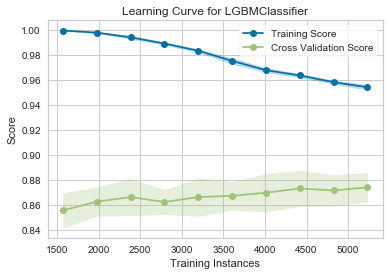

In [390]:
plot_model(estimator = dt, plot = 'learning')

In [ ]:
automl(optimize = 'Accuracy')

## References
- Application of Factor Analysis to k-means Clustering Algorithm on Transportation Data.
<a href="http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.673.5439&rep=rep1&type=pdf">Read the
    paper </a>
- <a href="https://medium.com/@masarudheena/4-best-ways-to-find-optimal-number-of-clusters-for-clustering-with-python-code-706199fa957c">Find Optimal Number of Clusters </a>
- <a href="https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c"> Silhouette coefficient </a>
- <a href="https://github.com/milesgranger/gap_statistic/blob/master/Example.ipynb">Gap Statistics</a>
- <a href="https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python">PCA</a>
- <a href="https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2">principal-component-analysis-and-k-means-clustering</a>
- <a href="https://365datascience.com/pca-k-means/" >PCA & Kmeans </a>
- <a href="https://www.datacamp.com/community/tutorials/introduction-factor-analysis" >Factor analysis</a>
- <a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba">Outlier detection & removal </a>
- <a href="https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019">HAC </a>
- <a href="https://towardsdatascience.com/clustering-evaluation-strategies-98a4006fcfc">Cluster evaluation</a>
- <a href="https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/">DBSCAN</a>
- <a href="https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e" >HDBSCAN </a>
- <a href="https://towardsdatascience.com/lightning-talk-clustering-with-hdbscan-d47b83d1b03a">DBSCAN vs  HDBSCAN</a>
- <a href="https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=The%20value%20of%202%20and,is%20above%20average%20silhouette%20scores.">Silhouette </a>
- <a href="https://www.researchgate.net/figure/Examples-of-cluster-plots-Cluster-plots-for-two-SNPs-One-spot-corresponds-to-one_fig1_40695417">Cluster plot</a>

## FUNCTIONS

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

### normalize_df()

In [ ]:
def normalize_df(df):
#normalizing before VIF
    min_max_scaler = preprocessing.MinMaxScaler()
    df_scaled = min_max_scaler.fit_transform(df)
    Scaled_df_used=pd.DataFrame(df_scaled,columns=df.columns.tolist(),index=df.index)
    return df_scaled,Scaled_df_used

### calculate_vif_(X, thresh)

In [ ]:
#VIF Treatment 
from joblib import Parallel, delayed

# Defining the function that you will run later
from datetime import datetime 
from joblib import Parallel, delayed

# Defining the function that you will run later
def calculate_vif_(X, thresh=5):
    
        now = datetime.now()
        date = now.date()
        current_time = now.strftime("%H:%M:%S")
        variables = [X.columns[i] for i in range(X.shape[1])]
        dropped=True
        while dropped:
            dropped=False
            print(len(variables))
            vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) 
                                                for ix in range(len(variables)))

            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print(str(current_time) + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                variables.pop(maxloc)
                dropped=True

        print('Remaining variables:')
        print([variables])
        return (variables)

### PCA_components(df)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

def PCA_components(df):
    """
    input to this function is scaled array of dataframe to be used
    """
    pca = PCA()
    pca.fit(df)
    exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

    return (px.area(
        x=range(1, exp_var_cumul.shape[0] + 1),
        y=exp_var_cumul,
        labels={"x": "# Components", "y": "Explained Variance"}
    ))
    

### outlier_removal(df)

In [ ]:
def outlier_removal(df):
    outliers = []

    # For each feature find the data points with extreme high or low values
    for feature in df.keys():

        # TODONE: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(df[feature], 25)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(df[feature], 75)

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1)*1.5

        results = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]

        # Display the outliers
        print("Data points considered outliers for the feature '{}':".format(feature))
        display(results)

        # OPTIONAL: Select the indices for data points you wish to remove
        outliers.extend(results.index.tolist())

    extreme_outliers = set([x for x in outliers if outliers.count(x) > 1])        
    unique_outliers = list(set(outliers))

    print('There are {} outliers and '.format(len(unique_outliers)))
    print('there are {} extreme outliers, which are: {}'.format(len(extreme_outliers), extreme_outliers))

    # Remove the outliers, if any were specified
    good_data = df.drop(index=outliers).reset_index(drop = True)
    return   good_data 